# SUP I
## Suplementos Alimentares
### Case de Marketing e Análise de Dados
- Enzo Patelli Junqueira
- Lorena Barbosa Antunes da Silva
- Murilo Wadt
- Ana Carolina Gonçalves
- Ana Luiza Heitor


Importação de bibliotecas:

In [714]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
from numpy import arange 
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score
import math
from collections import Counter
from itertools import chain
import math

Carregando a base de dados em um dataframe usando a biblioteca pandas:

Exclusão da primeira linha, com as perguntas escritas, manualmente.


In [715]:
df = pd.read_excel('Base - Pesquisa de Mercado.xlsx', sheet_name=0)

Verifica a frequencia daqueles que consomem alimentos fitness. 
O elemento 5 corresponde aqueles que não consomem alimentos fitness.

In [716]:
df.Qfreq.value_counts(normalize=True)

5    0.517094
1    0.235043
2    0.108262
4    0.072650
3    0.066952
Name: Qfreq, dtype: float64

Confere que mais de 50% dos respondentes não consomem produtos da linha fitness ou focados bem estar.

Verifica o tipo de dado em cada coluna do dataframe:

In [717]:
df.dtypes

Qfreq        int64
P2          object
P3         float64
P4         float64
P5         float64
P6         float64
P7         float64
P8         float64
P9         float64
P12         object
P13         object
P14         object
P15        float64
P16        float64
P17        float64
P18        float64
P19        float64
P20        float64
P21        float64
P22        float64
P23        float64
P24        float64
P25        float64
P26        float64
Qesc         int64
Qciv         int64
Qocup      float64
Qgen       float64
Qid          int64
Qreg         int64
Qclasse      int64
dtype: object

Normaliza o tipo de dado das seguintes colunas:

In [718]:
df.Qfreq = df['Qfreq'].astype('float')
df.Qid = df['Qid'].astype('float')


In [719]:
df.describe()

,Qfreq,P3,P4,P5,P6,P7,P8,P9,P15,P16,...,P24,P25,P26,Qesc,Qciv,Qocup,Qgen,Qid,Qreg,Qclasse
count,702.000000,363.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,702.000000,702.000000,400.000000,698.000000,702.000000,702.000000,702.00000
mean,3.528490,4.088154,4.982301,3.053097,3.669617,4.681416,4.268437,3.663717,5.756863,4.988235,...,5.031373,5.105882,5.317647,4.703704,1.474359,2.922500,1.505731,21.039886,2.190883,2.64245
std,1.707135,2.043166,2.099517,2.316039,2.356533,1.995255,2.503590,2.558004,1.656442,1.995038,...,1.968001,1.998170,1.793767,1.071196,0.754481,1.261138,0.500326,18.963396,1.437436,1.42289
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
25%,2.000000,2.000000,3.000000,1.000000,1.000000,3.000000,1.000000,1.000000,5.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.00000
50%,5.000000,4.000000,6.000000,2.000000,4.000000,5.000000,5.000000,3.000000,7.000000,5.000000,...,5.000000,6.000000,6.000000,5.000000,1.000000,3.000000,2.000000,20.000000,1.000000,3.00000
75%,5.000000,6.000000,7.000000,5.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,5.000000,2.000000,4.000000,2.000000,35.000000,4.000000,4.00000
max,5.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,6.000000,5.000000,6.000000,2.000000,100.000000,5.000000,5.00000


Percebemos que as respostas das idades não estavam padronizadas nas faixas de idade, então fizemos uma função para padronizar as idades nas faixas certas.


In [720]:
i=0
while i < len(df.Qid):
    if df.Qid[i] > 6:
        if df.Qid[i] < 18:
            df.Qid[i] = 1
        elif df.Qid[i] < 25:
            df.Qid[i] = 2
        elif df.Qid[i] < 35:
            df.Qid[i] = 3
        elif df.Qid[i] < 45:
            df.Qid[i] = 4
        elif df.Qid[i] < 55:
            df.Qid[i] = 5
        else:
            df.Qid[i] = 6
    i+=1

C:\Users\Enzo\AppData\Local\Temp\ipykernel_13292\2702381451.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Qid[i] = 3
C:\Users\Enzo\AppData\Local\Temp\ipykernel_13292\2702381451.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Qid[i] = 6
C:\Users\Enzo\AppData\Local\Temp\ipykernel_13292\2702381451.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Qid[i] = 2
C:\Users\Enzo\AppData\Local\Temp\ipykernel_13292\2702381451.

Plotamos gráficos com dados demográficos de todos os respondentes da base de dados a fim de perceber o público entrevistado.

Text(0.5, 0, 'Classe')

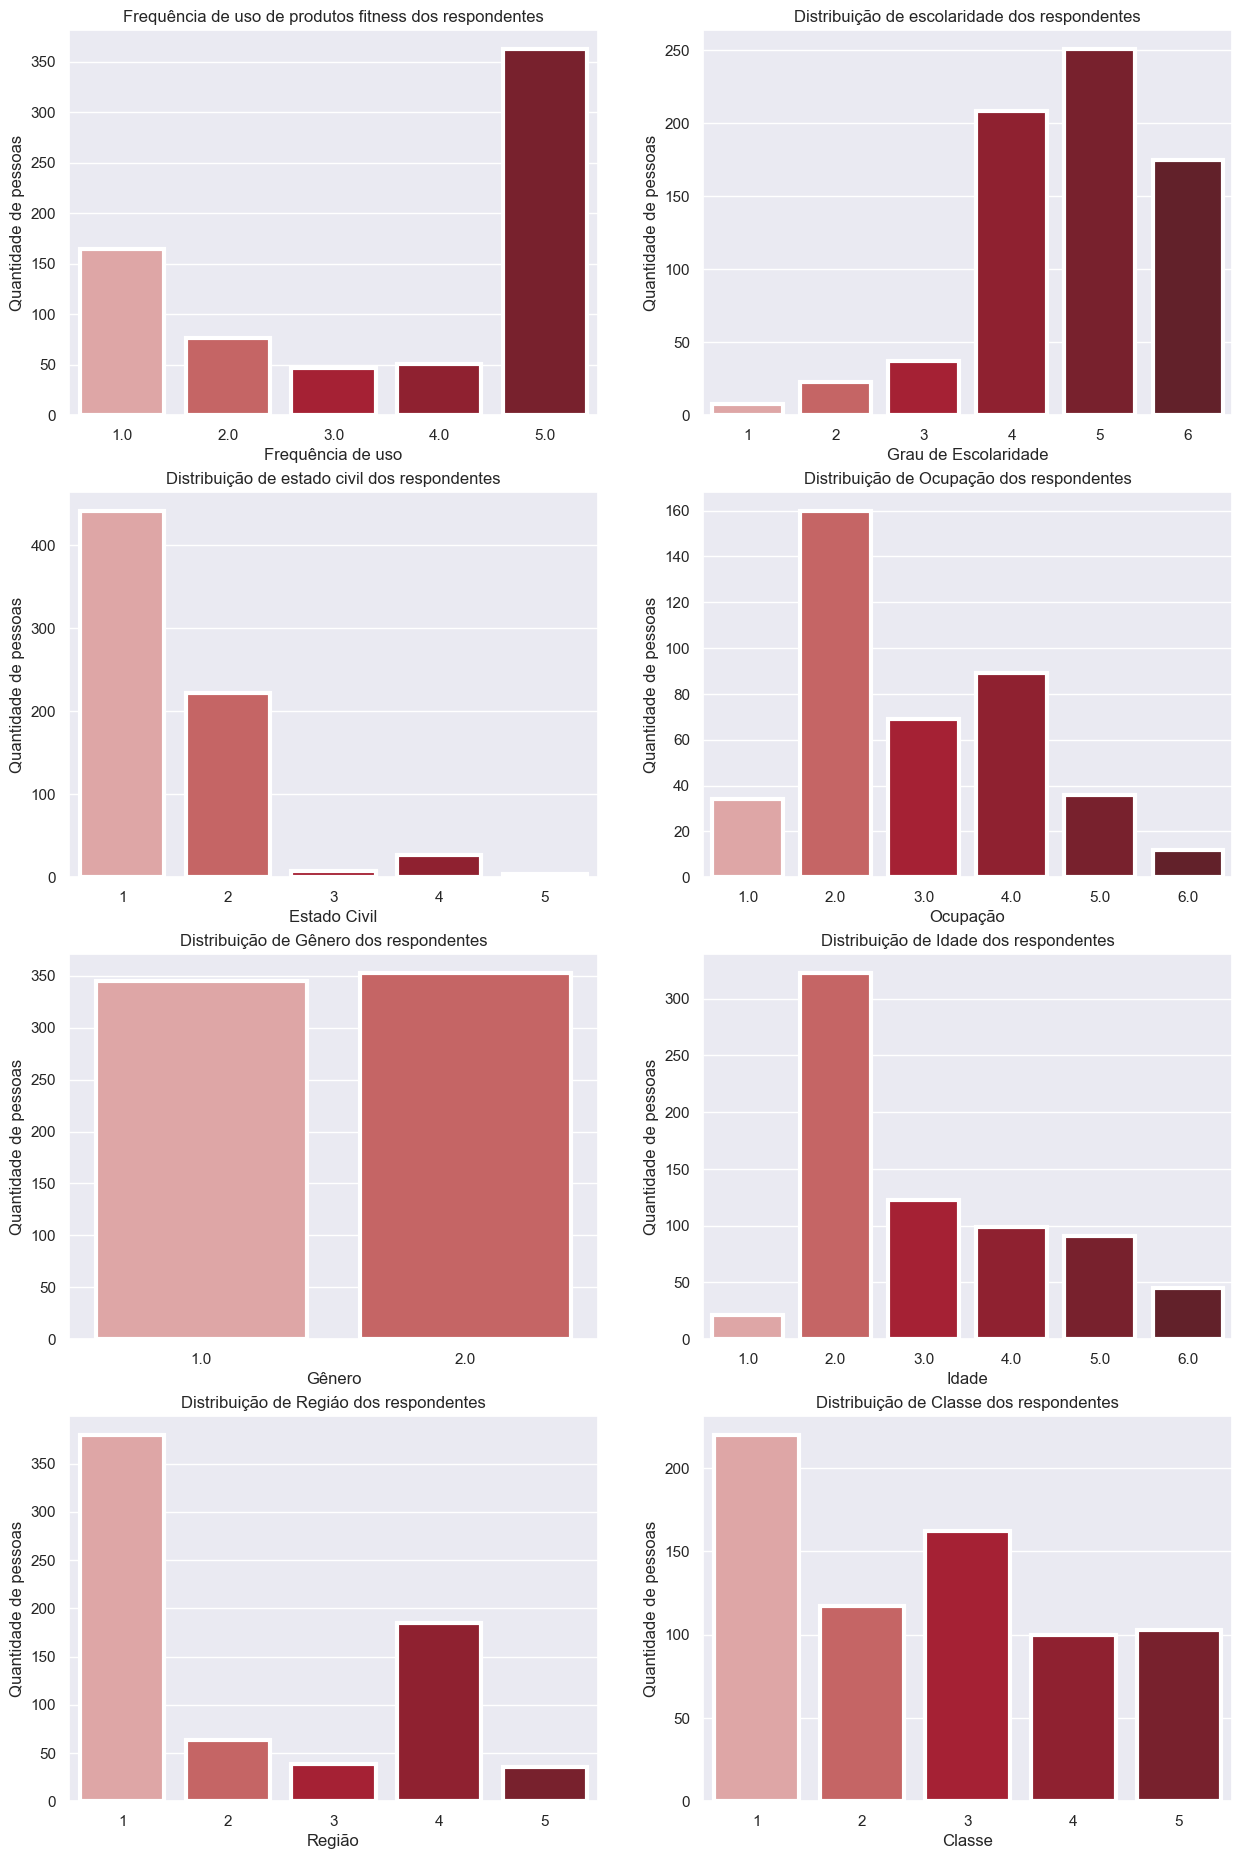

In [721]:
faixa= range(1,8,1)
plt.figure(figsize=(15,35))
plt.subplot(621)
sns.countplot(data= df, x="Qfreq", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Frequência de uso de produtos fitness dos respondentes')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Frequência de uso')

plt.subplot(622)
sns.countplot(data= df, x="Qesc", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Distribuição de escolaridade dos respondentes')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Grau de Escolaridade')

plt.subplot(623)
sns.countplot(data= df, x="Qciv", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Distribuição de estado civil dos respondentes')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Estado Civil')

plt.subplot(624)
sns.countplot(data= df, x="Qocup", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Distribuição de Ocupação dos respondentes')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Ocupação')

plt.subplot(625)
sns.countplot(data= df, x="Qgen", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Distribuição de Gênero dos respondentes')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Gênero')

plt.subplot(626)
sns.countplot(data= df, x="Qid", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Distribuição de Idade dos respondentes')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Idade')

plt.subplot(627)
sns.countplot(data= df, x="Qreg", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Distribuição de Regiáo dos respondentes')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Região')

plt.subplot(628)
sns.countplot(data= df, x="Qclasse", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Distribuição de Classe dos respondentes')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Classe')

Como mais de 50% dos respondentes não utilizam produtos fitness, decidimos dividir em dois grupos, os que usam e os que não usam (representado pela resposta '5').

In [722]:
df_naousa = df[df.Qfreq==5]

df_naousa

,Qfreq,P2,P3,P4,P5,P6,P7,P8,P9,P12,...,P24,P25,P26,Qesc,Qciv,Qocup,Qgen,Qid,Qreg,Qclasse
7,5.0,2,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4,1,3.0,1.0,2.0,4,5
10,5.0,2,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3,1,5.0,1.0,2.0,3,5
14,5.0,1;3;4,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4,1,4.0,1.0,2.0,3,5
15,5.0,1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3,1,3.0,1.0,1.0,4,5
17,5.0,7,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4,2,2.0,1.0,2.0,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,5.0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4,1,NaN,2.0,2.0,1,1
698,5.0,1; 5,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5,1,NaN,1.0,2.0,1,2
699,5.0,5,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6,2,NaN,2.0,4.0,4,1
700,5.0,5,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4,1,NaN,1.0,2.0,4,5


Procuramos as informações relevantes das pessoas que não usam.

In [723]:
df_naousa.iloc[:,[0,1,2,24,25,26,27,28,29,30]].describe()



,Qfreq,P3,Qesc,Qciv,Qocup,Qgen,Qid,Qreg,Qclasse
count,363.0,363.000000,363.000000,363.000000,139.000000,361.000000,363.000000,363.000000,363.000000
mean,5.0,4.088154,4.867769,1.402204,3.021583,1.476454,2.920110,2.123967,2.074380
std,0.0,2.043166,0.965786,0.675699,1.236332,0.500138,1.342755,1.384026,1.303408
min,5.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5.0,2.000000,4.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,5.0,4.000000,5.000000,1.000000,3.000000,1.000000,2.000000,1.000000,2.000000
75%,5.0,6.000000,6.000000,2.000000,4.000000,2.000000,4.000000,4.000000,3.000000
max,5.0,7.000000,6.000000,5.000000,6.000000,2.000000,6.000000,5.000000,5.000000


Plotamos os gráficos demográficos daqueles que não utilizam produtos fitness.

Text(0.5, 0, 'Utilizariam produtos se fossem mais baratos')

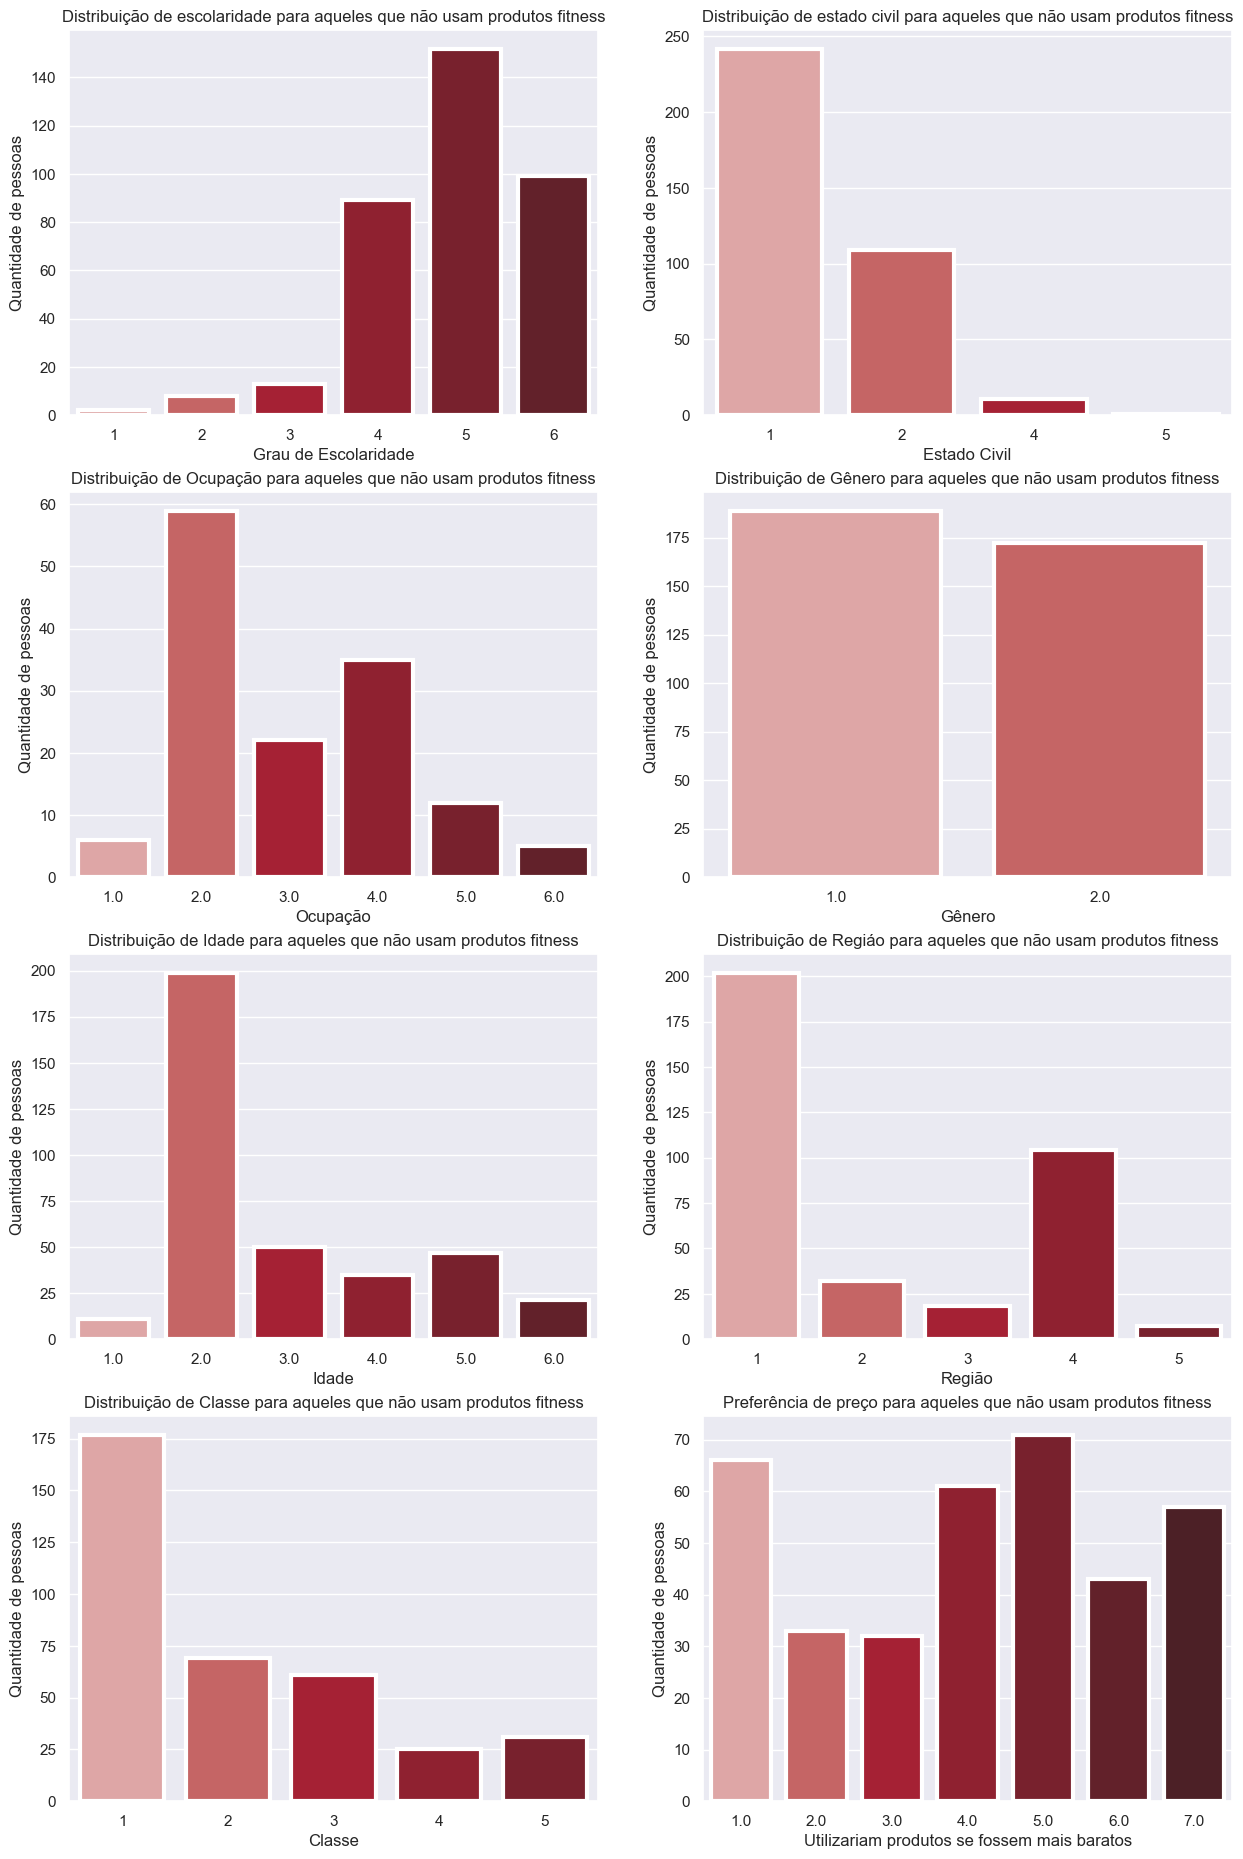

In [724]:
faixa= range(1,8,1)
plt.figure(figsize=(15,35))
plt.subplot(621)
sns.countplot(data= df_naousa, x="Qesc", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Distribuição de escolaridade para aqueles que não usam produtos fitness')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Grau de Escolaridade')

plt.subplot(622)
sns.countplot(data= df_naousa, x="Qciv", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Distribuição de estado civil para aqueles que não usam produtos fitness')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Estado Civil')

plt.subplot(623)
sns.countplot(data= df_naousa, x="Qocup", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Distribuição de Ocupação para aqueles que não usam produtos fitness')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Ocupação')

plt.subplot(624)
sns.countplot(data= df_naousa, x="Qgen", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Distribuição de Gênero para aqueles que não usam produtos fitness')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Gênero')

plt.subplot(625)
sns.countplot(data= df_naousa, x="Qid", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Distribuição de Idade para aqueles que não usam produtos fitness')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Idade')

plt.subplot(626)
sns.countplot(data= df_naousa, x="Qreg", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Distribuição de Regiáo para aqueles que não usam produtos fitness')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Região')

plt.subplot(627)
sns.countplot(data= df_naousa, x="Qclasse", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Distribuição de Classe para aqueles que não usam produtos fitness')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Classe')

plt.subplot(628)
sns.countplot(data= df_naousa, x="P3", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Preferência de preço para aqueles que não usam produtos fitness')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Utilizariam produtos se fossem mais baratos')


A partir da análise dos dados no Excel, foi possível observar que aqueles que respondiam '2' na pergunta 12 (P12) não utilizam suplementos.

In [725]:
df_naosup = df[df.P12==2]
df_naosup.describe()

,Qfreq,P3,P4,P5,P6,P7,P8,P9,P15,P16,...,P24,P25,P26,Qesc,Qciv,Qocup,Qgen,Qid,Qreg,Qclasse
count,84.000000,0.0,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,0.0,0.0,...,0.0,0.0,0.0,84.000000,84.000000,65.000000,83.000000,84.000000,84.000000,84.000000
mean,1.797619,NaN,4.440476,2.964286,3.476190,4.333333,4.000000,3.321429,NaN,NaN,...,NaN,NaN,NaN,4.440476,1.452381,2.953846,1.566265,3.214286,2.083333,3.345238
std,1.027100,NaN,2.299037,2.386945,2.351499,2.251283,2.578876,2.593601,NaN,NaN,...,NaN,NaN,NaN,1.165273,0.665949,1.178330,0.498602,1.326935,1.424471,1.392701
min,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,NaN,2.000000,1.000000,1.000000,2.750000,1.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,4.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000
50%,1.000000,NaN,4.500000,1.500000,3.500000,4.000000,4.000000,2.000000,NaN,NaN,...,NaN,NaN,NaN,4.000000,1.000000,3.000000,2.000000,3.000000,1.000000,3.500000
75%,3.000000,NaN,7.000000,5.000000,5.000000,7.000000,7.000000,7.000000,NaN,NaN,...,NaN,NaN,NaN,5.000000,2.000000,4.000000,2.000000,4.000000,4.000000,5.000000
max,4.000000,NaN,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,NaN,NaN,...,NaN,NaN,NaN,6.000000,4.000000,6.000000,2.000000,6.000000,5.000000,5.000000


Plotamos os gráficos demográficos daqueles que utilizam suplementos.

Text(0.5, 0, 'AutoPrescrição')

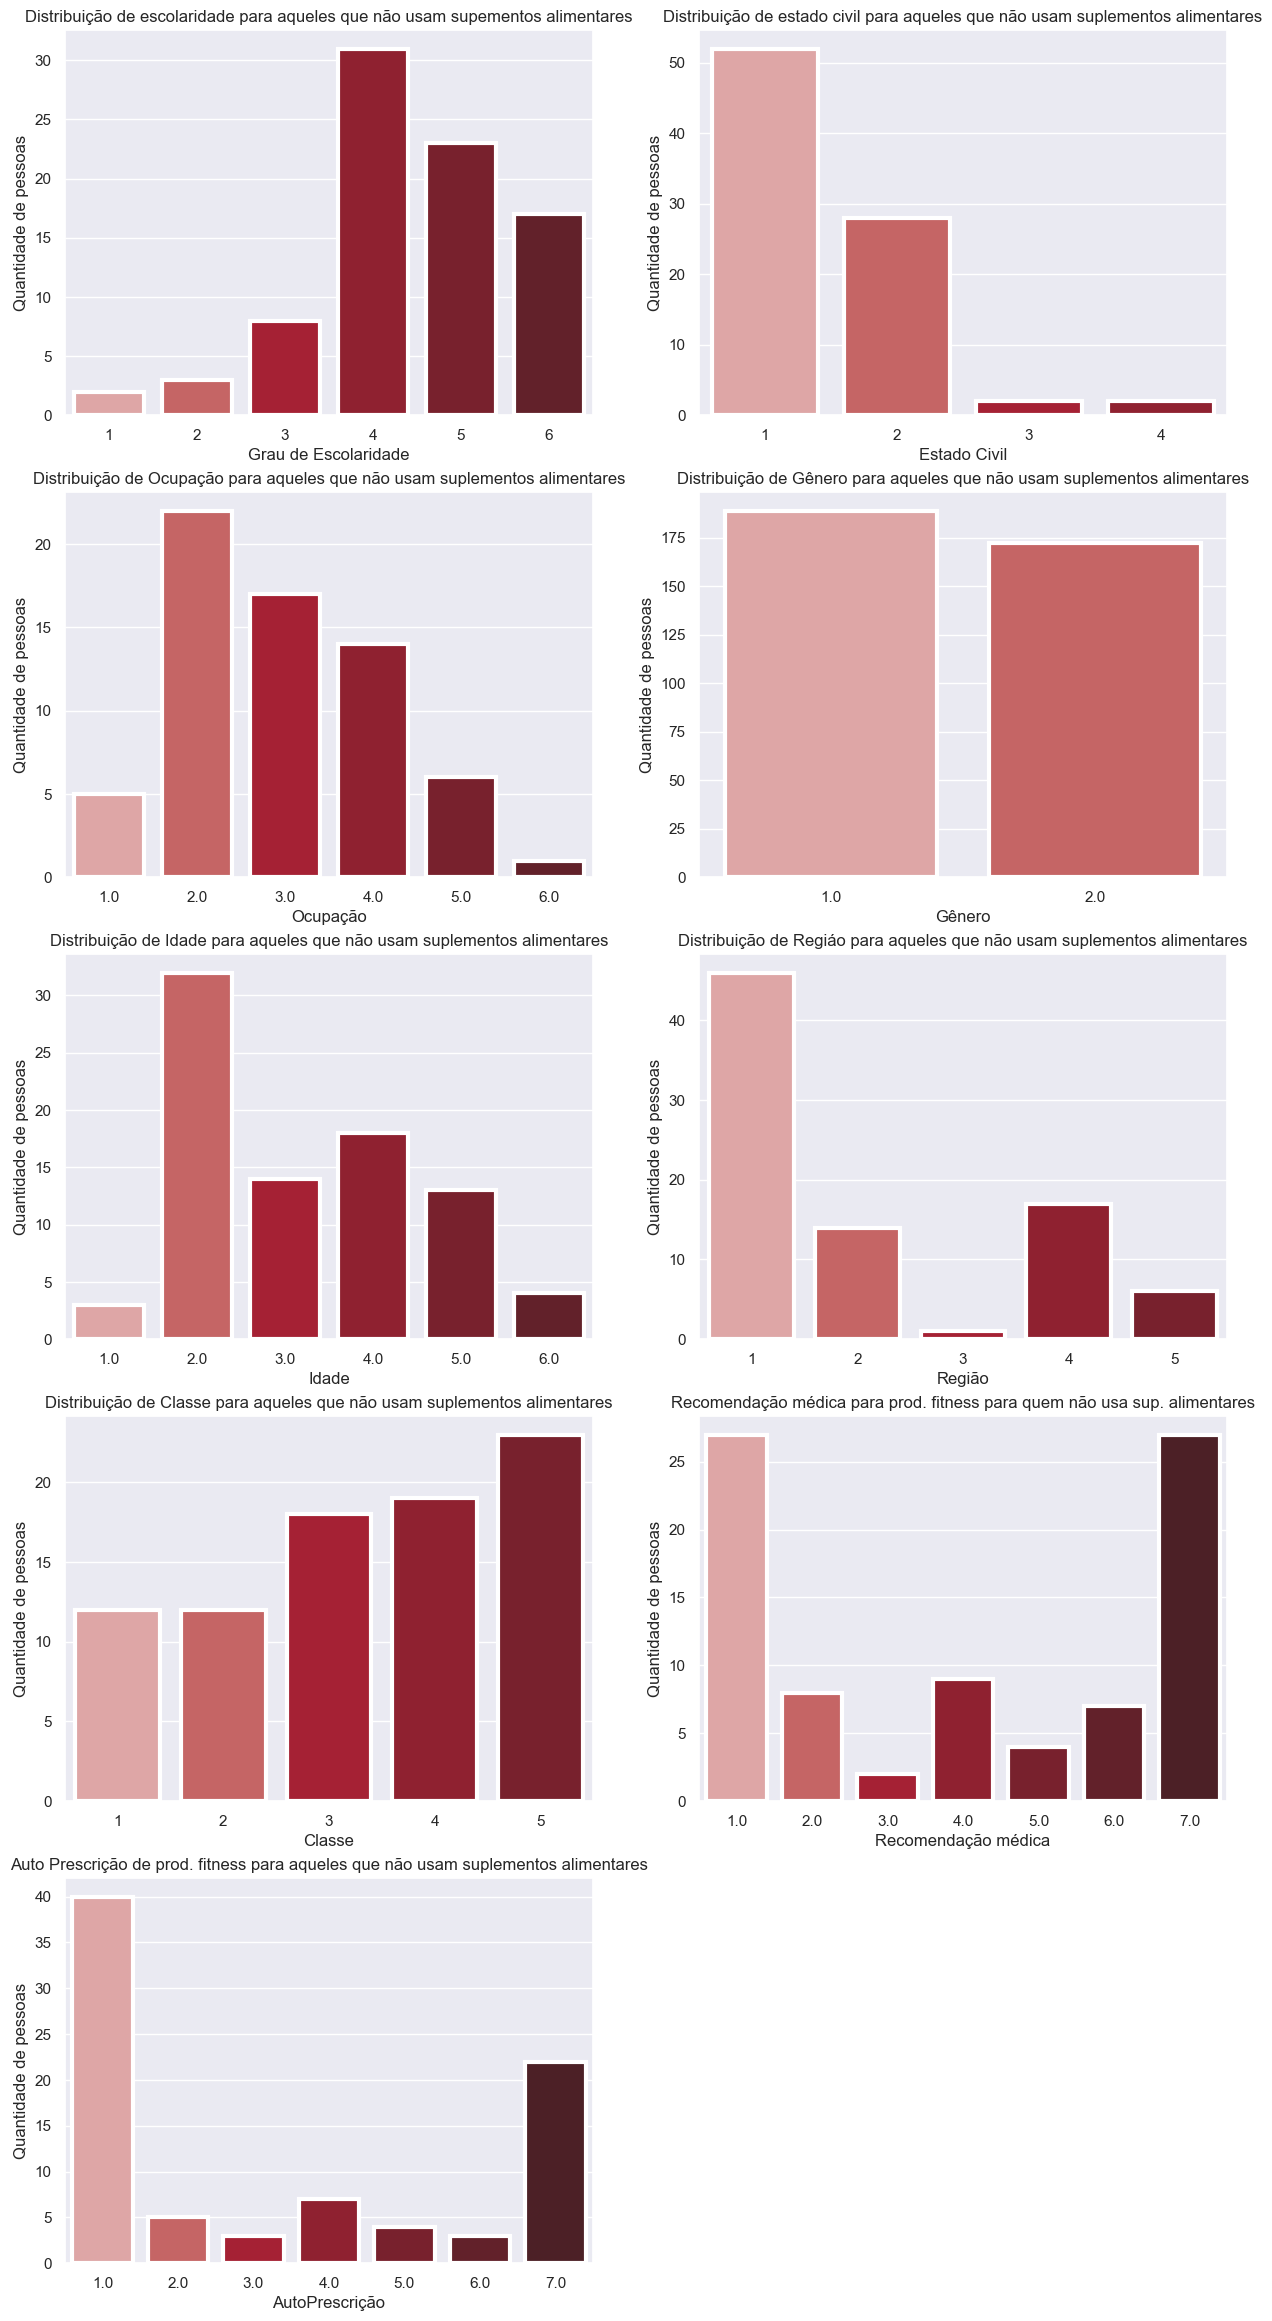

In [726]:
faixa= range(1,8,1)
plt.figure(figsize=(15,35))
plt.subplot(621)
sns.countplot(data= df_naosup, x="Qesc", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Distribuição de escolaridade para aqueles que não usam supementos alimentares')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Grau de Escolaridade')

plt.subplot(622)
sns.countplot(data= df_naosup, x="Qciv", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Distribuição de estado civil para aqueles que não usam suplementos alimentares')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Estado Civil')

plt.subplot(623)
sns.countplot(data= df_naosup, x="Qocup", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Distribuição de Ocupação para aqueles que não usam suplementos alimentares')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Ocupação')

plt.subplot(624)
sns.countplot(data= df_naousa, x="Qgen", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Distribuição de Gênero para aqueles que não usam suplementos alimentares')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Gênero')

plt.subplot(625)
sns.countplot(data= df_naosup, x="Qid", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Distribuição de Idade para aqueles que não usam suplementos alimentares')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Idade')

plt.subplot(626)
sns.countplot(data= df_naosup, x="Qreg", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Distribuição de Regiáo para aqueles que não usam suplementos alimentares')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Região')

plt.subplot(627)
sns.countplot(data= df_naosup, x="Qclasse", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Distribuição de Classe para aqueles que não usam suplementos alimentares')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Classe')

plt.subplot(628)
sns.countplot(data= df_naosup, x="P8", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Recomendação médica para prod. fitness para quem não usa sup. alimentares')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Recomendação médica')

plt.subplot(629)
sns.countplot(data= df_naosup, x="P9", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Auto Prescrição de prod. fitness para aqueles que não usam suplementos alimentares')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('AutoPrescrição')

Separamos os dataframes em df_usaf e df_usa, sendo aqueles que usam alimentos fitness e os que usam suplementos, respectivamente.

In [727]:
df_usaf = df[df.Qfreq != 5]
df_usa = df_usaf[df_usaf.P12 != 2]
df_usa.describe()

,Qfreq,P3,P4,P5,P6,P7,P8,P9,P15,P16,...,P24,P25,P26,Qesc,Qciv,Qocup,Qgen,Qid,Qreg,Qclasse
count,255.000000,0.0,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,196.000000,254.000000,255.000000,255.000000,255.000000
mean,2.003922,NaN,5.160784,3.082353,3.733333,4.796078,4.356863,3.776471,5.756863,4.988235,...,5.031373,5.105882,5.317647,4.556863,1.584314,2.841837,1.527559,3.243137,2.321569,3.219608
std,1.131155,NaN,2.002369,2.296240,2.359323,1.894247,2.477080,2.541203,1.656442,1.995038,...,1.968001,1.998170,1.793767,1.144871,0.869286,1.305014,0.500226,1.338299,1.510633,1.254444
min,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,NaN,4.000000,1.000000,1.000000,3.500000,1.000000,1.000000,5.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000
50%,2.000000,NaN,6.000000,2.000000,4.000000,5.000000,5.000000,4.000000,7.000000,5.000000,...,5.000000,6.000000,6.000000,5.000000,1.000000,2.000000,2.000000,3.000000,1.000000,3.000000
75%,3.000000,NaN,7.000000,5.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,5.000000,2.000000,4.000000,2.000000,4.000000,4.000000,4.000000
max,4.000000,NaN,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,6.000000,5.000000,6.000000,2.000000,6.000000,5.000000,5.000000


Plotamos os gráficos demográficos daqueles que consomem alimentos fitness para uma análise exploratória dos dados.

Text(0.5, 0, 'Classe')

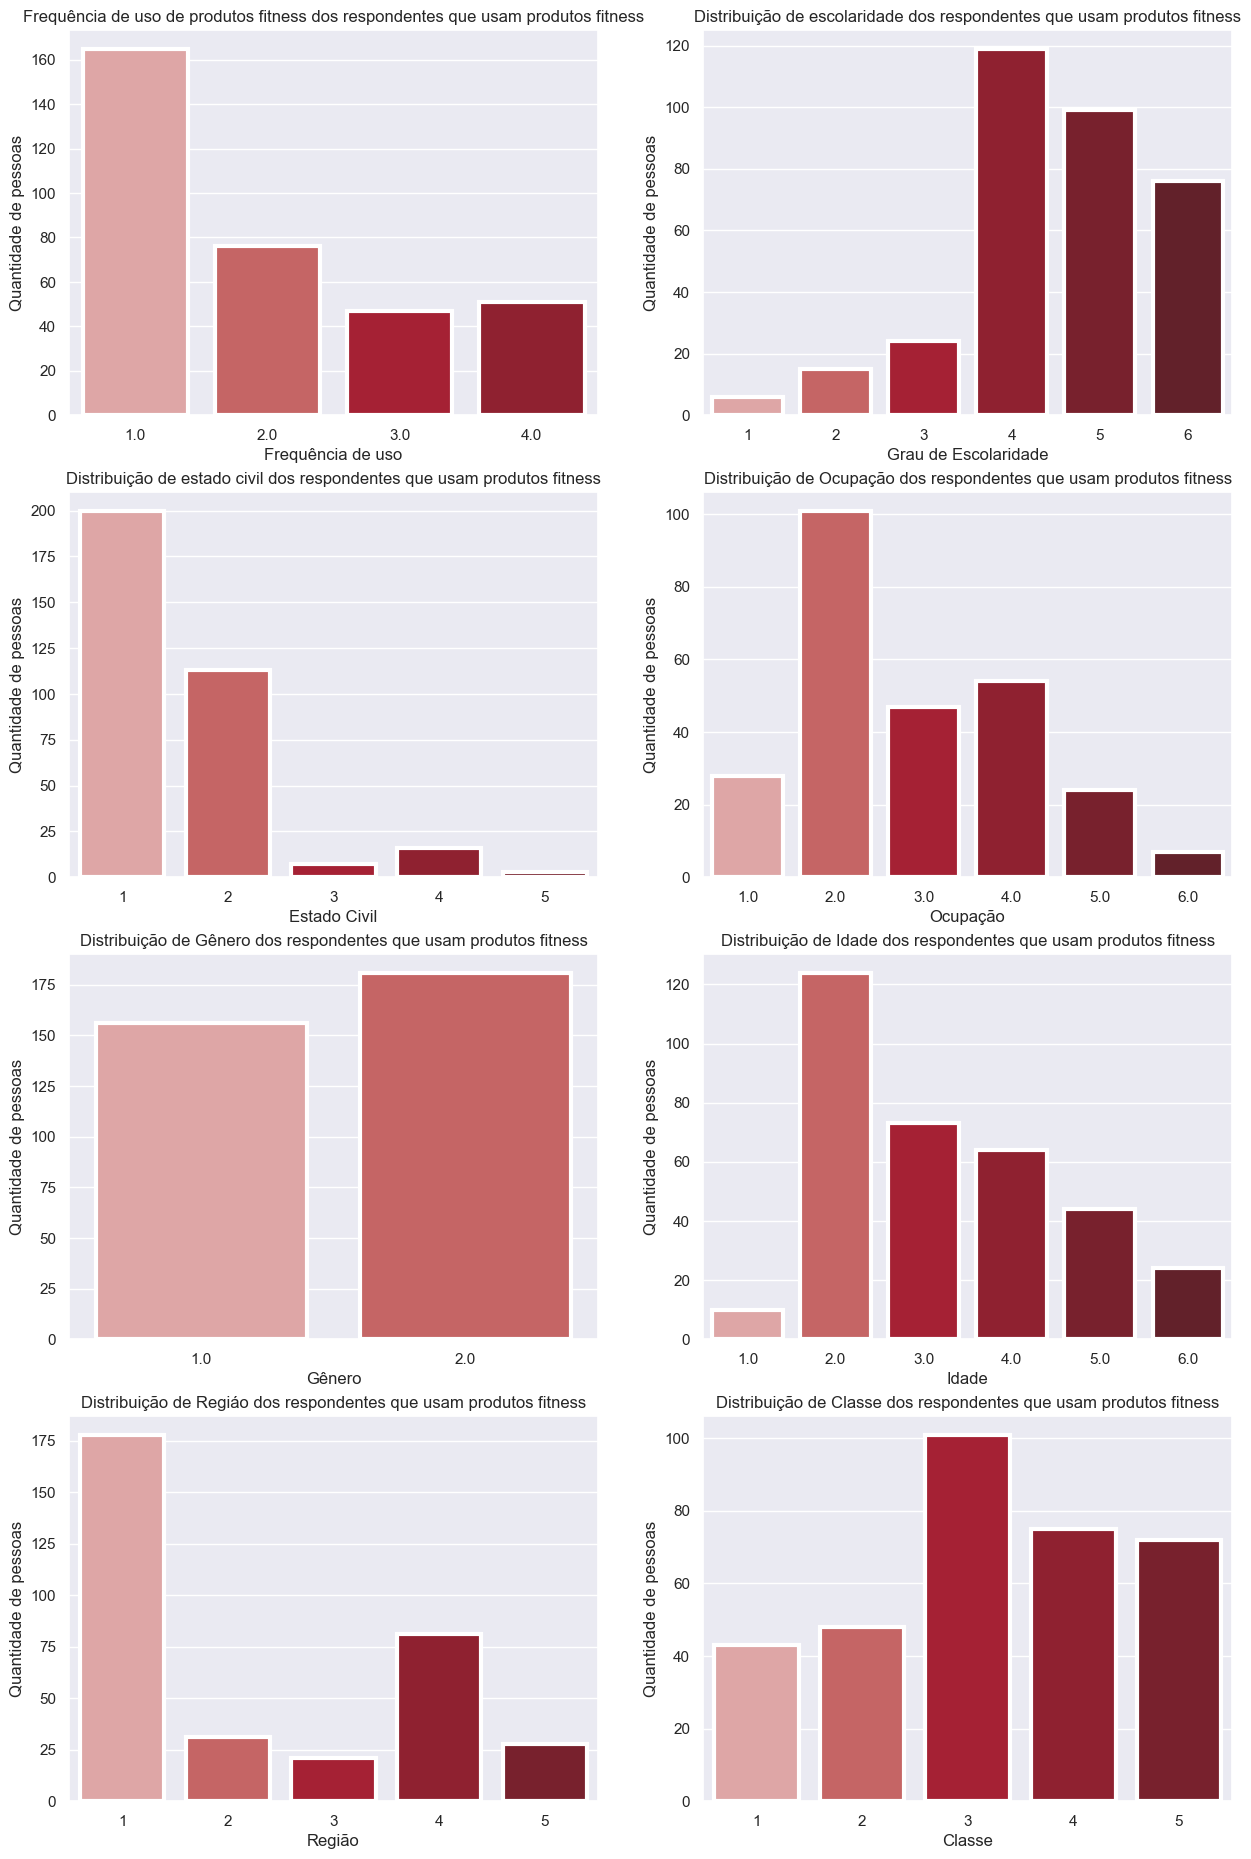

In [728]:
faixa= range(1,8,1)
plt.figure(figsize=(15,35))
plt.subplot(621)
sns.countplot(data= df_usaf, x="Qfreq", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Frequência de uso de produtos fitness dos respondentes que usam produtos fitness')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Frequência de uso')

plt.subplot(622)
sns.countplot(data= df_usaf, x="Qesc", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Distribuição de escolaridade dos respondentes que usam produtos fitness')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Grau de Escolaridade')

plt.subplot(623)
sns.countplot(data= df_usaf, x="Qciv", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Distribuição de estado civil dos respondentes que usam produtos fitness')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Estado Civil')

plt.subplot(624)
sns.countplot(data= df_usaf, x="Qocup", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Distribuição de Ocupação dos respondentes que usam produtos fitness')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Ocupação')

plt.subplot(625)
sns.countplot(data= df_usaf, x="Qgen", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Distribuição de Gênero dos respondentes que usam produtos fitness')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Gênero')

plt.subplot(626)
sns.countplot(data= df_usaf, x="Qid", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Distribuição de Idade dos respondentes que usam produtos fitness')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Idade')

plt.subplot(627)
sns.countplot(data= df_usaf, x="Qreg", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Distribuição de Regiáo dos respondentes que usam produtos fitness')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Região')

plt.subplot(628)
sns.countplot(data= df_usaf, x="Qclasse", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Distribuição de Classe dos respondentes que usam produtos fitness')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Classe')

Plotamos gráficos da frequência de respostas das perguntas feitas para aqueles que consumiam alimentos fitness para realizarmos uma análise exploratória dos dados.


Text(0.5, 0, 'P19')

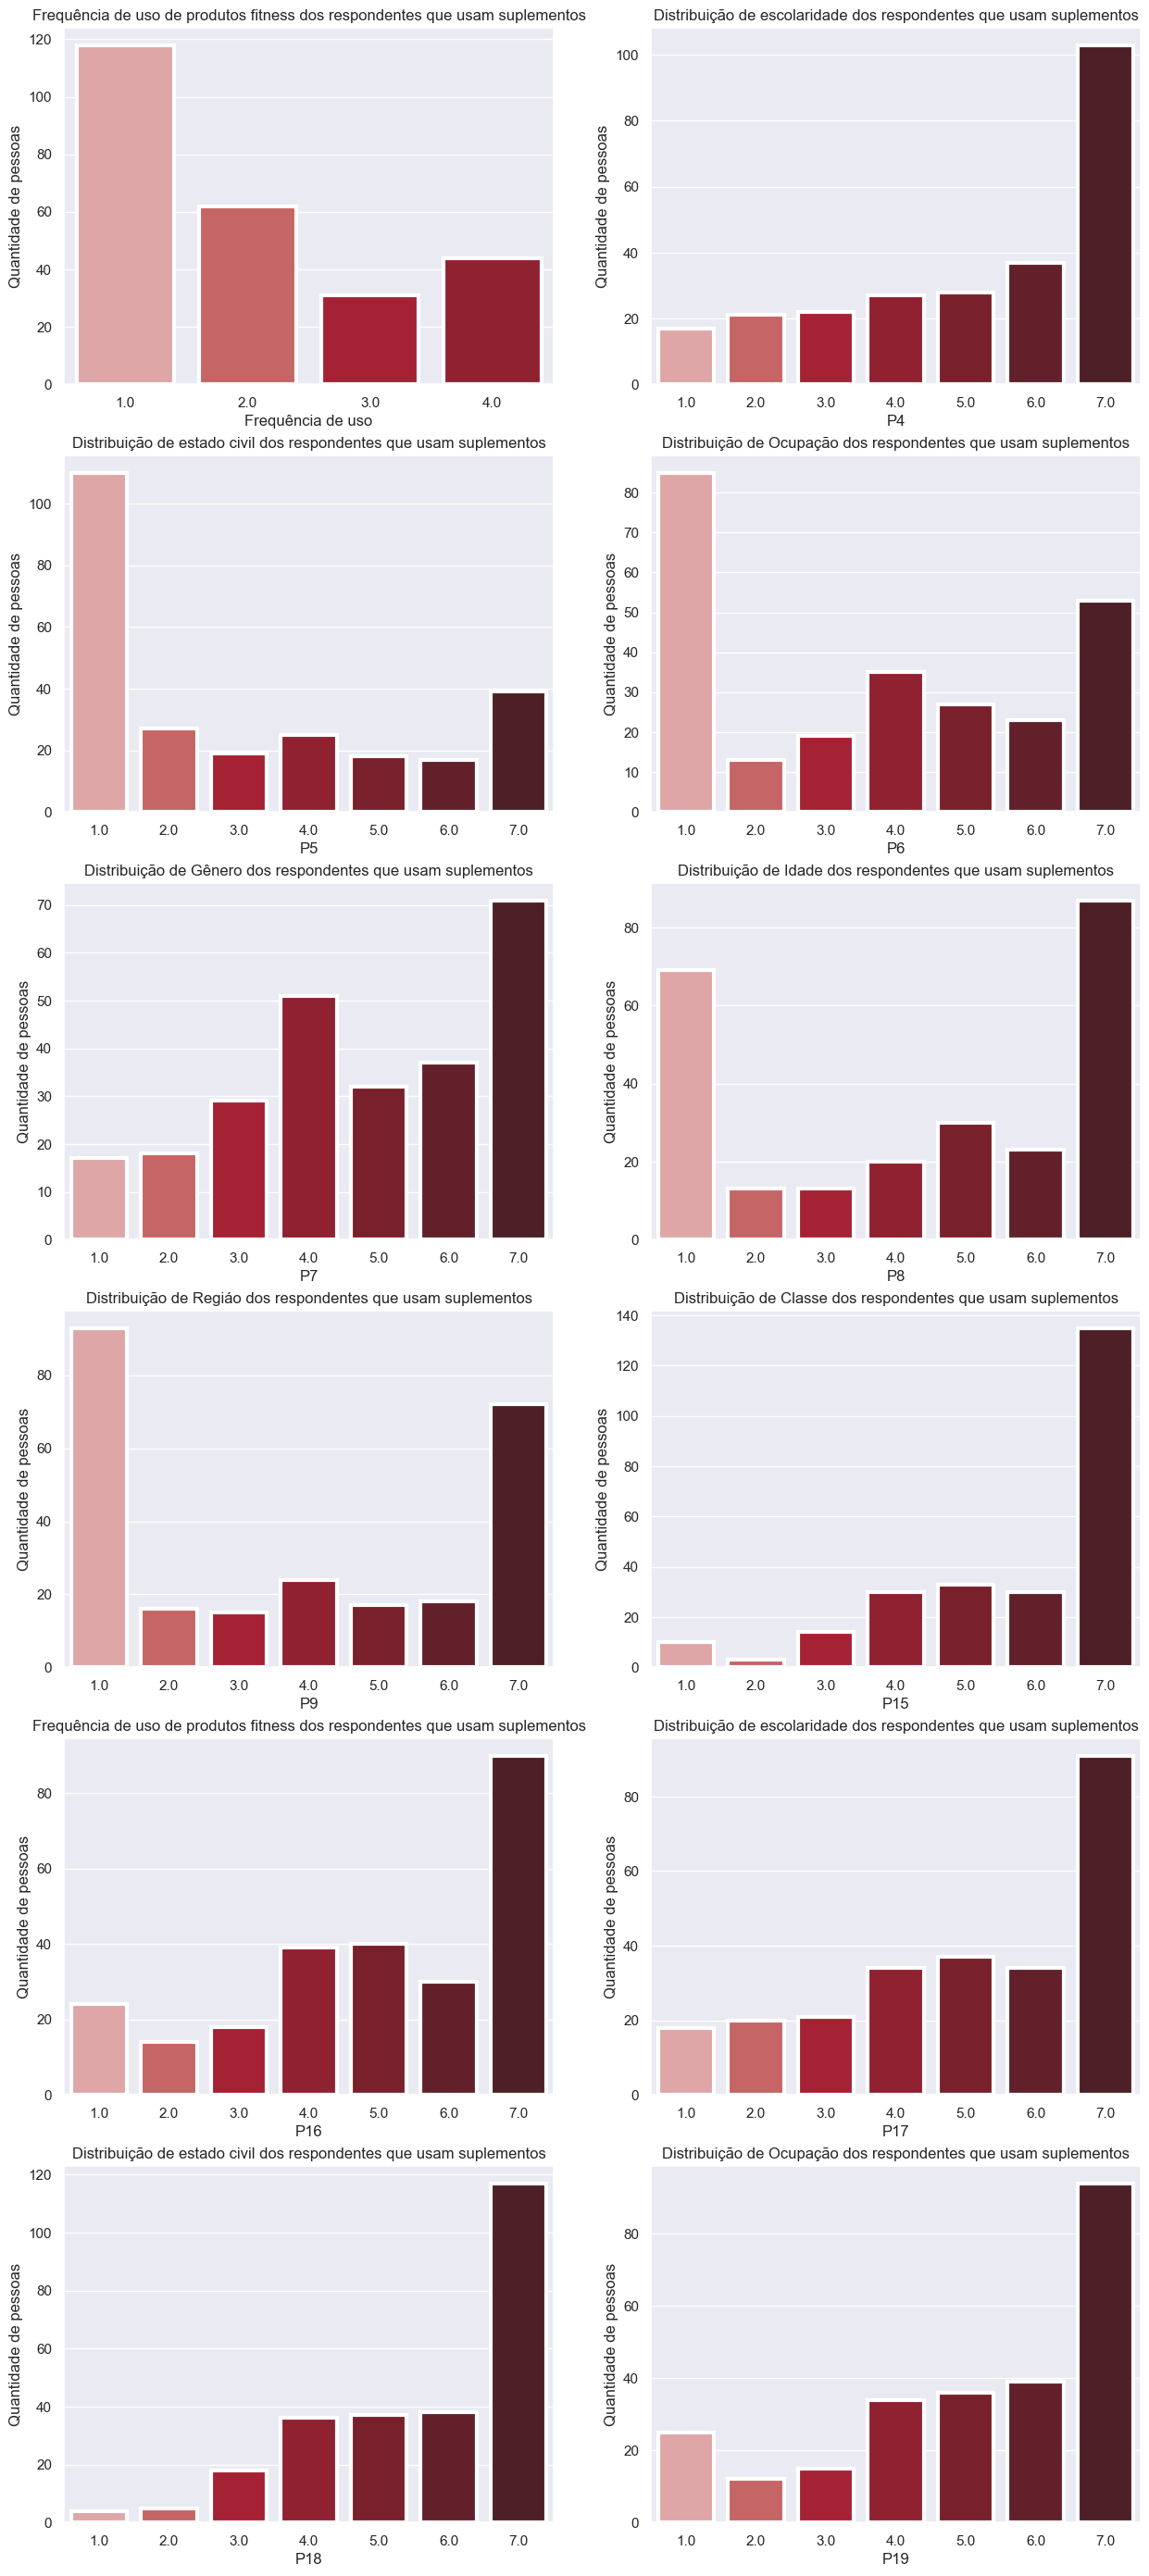

In [729]:
faixa= range(1,8,1)
plt.figure(figsize=(15,35))
plt.subplot(621)
sns.countplot(data= df_usa, x="Qfreq", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Frequência de uso de produtos fitness dos respondentes que usam suplementos')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Frequência de uso')

plt.subplot(622)
sns.countplot(data= df_usa, x="P4", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Dos que usam suplementos, qual a preferência por biscoito')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Preferencia de 1 a 7')

plt.subplot(623)
sns.countplot(data= df_usa, x="P5", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Dos que usam suplementos, qual a preferência por snacks')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Preferencia de 1 a 7')

plt.subplot(624)
sns.countplot(data= df_usa, x="P6", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Dos que usam suplementos, qual a preferência por suplemento')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Preferencia de 1 a 7')

plt.subplot(625)
sns.countplot(data= df_usa, x="P7", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Dos que usam suplementos, qual a preferência por outros produtos fitness')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Preferencia de 1 a 7')

plt.subplot(626)
sns.countplot(data= df_usa, x="P8", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Dos que usam suplementos, quais usam por recomendação médica')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Preferencia de 1 a 7')

plt.subplot(627)
sns.countplot(data= df_usa, x="P9", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Dos que usam suplementos, quais usam por auto prescrição')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Preferencia de 1 a 7')

plt.subplot(628)
sns.countplot(data= df_usa, x="P15", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Dos que usam suplementos, qual a preferência por Whey Protein')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Preferencia de 1 a 7')

plt.subplot(629)
sns.countplot(data= df_usa, x="P16", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Dos que usam suplementos, qual a preferência por vitaminas')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Preferencia de 1 a 7')

plt.subplot(6,2,10)
sns.countplot(data= df_usa, x="P17", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Dos que usam suplementos, qual a preferência por Omega 3')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Preferencia de 1 a 7')

plt.subplot(6,2,11)
sns.countplot(data= df_usa, x="P18", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Dos que usam suplementos, qual a preferência por outros suplementos')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Preferencia de 1 a 7')

plt.subplot(6,2,12)
sns.countplot(data= df_usa, x="P19",palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Dos que usam suplementos, quais frequentam academia mais de 4 vezes na semana')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Preferencia de 1 a 7')



Text(0.5, 0, 'P26')

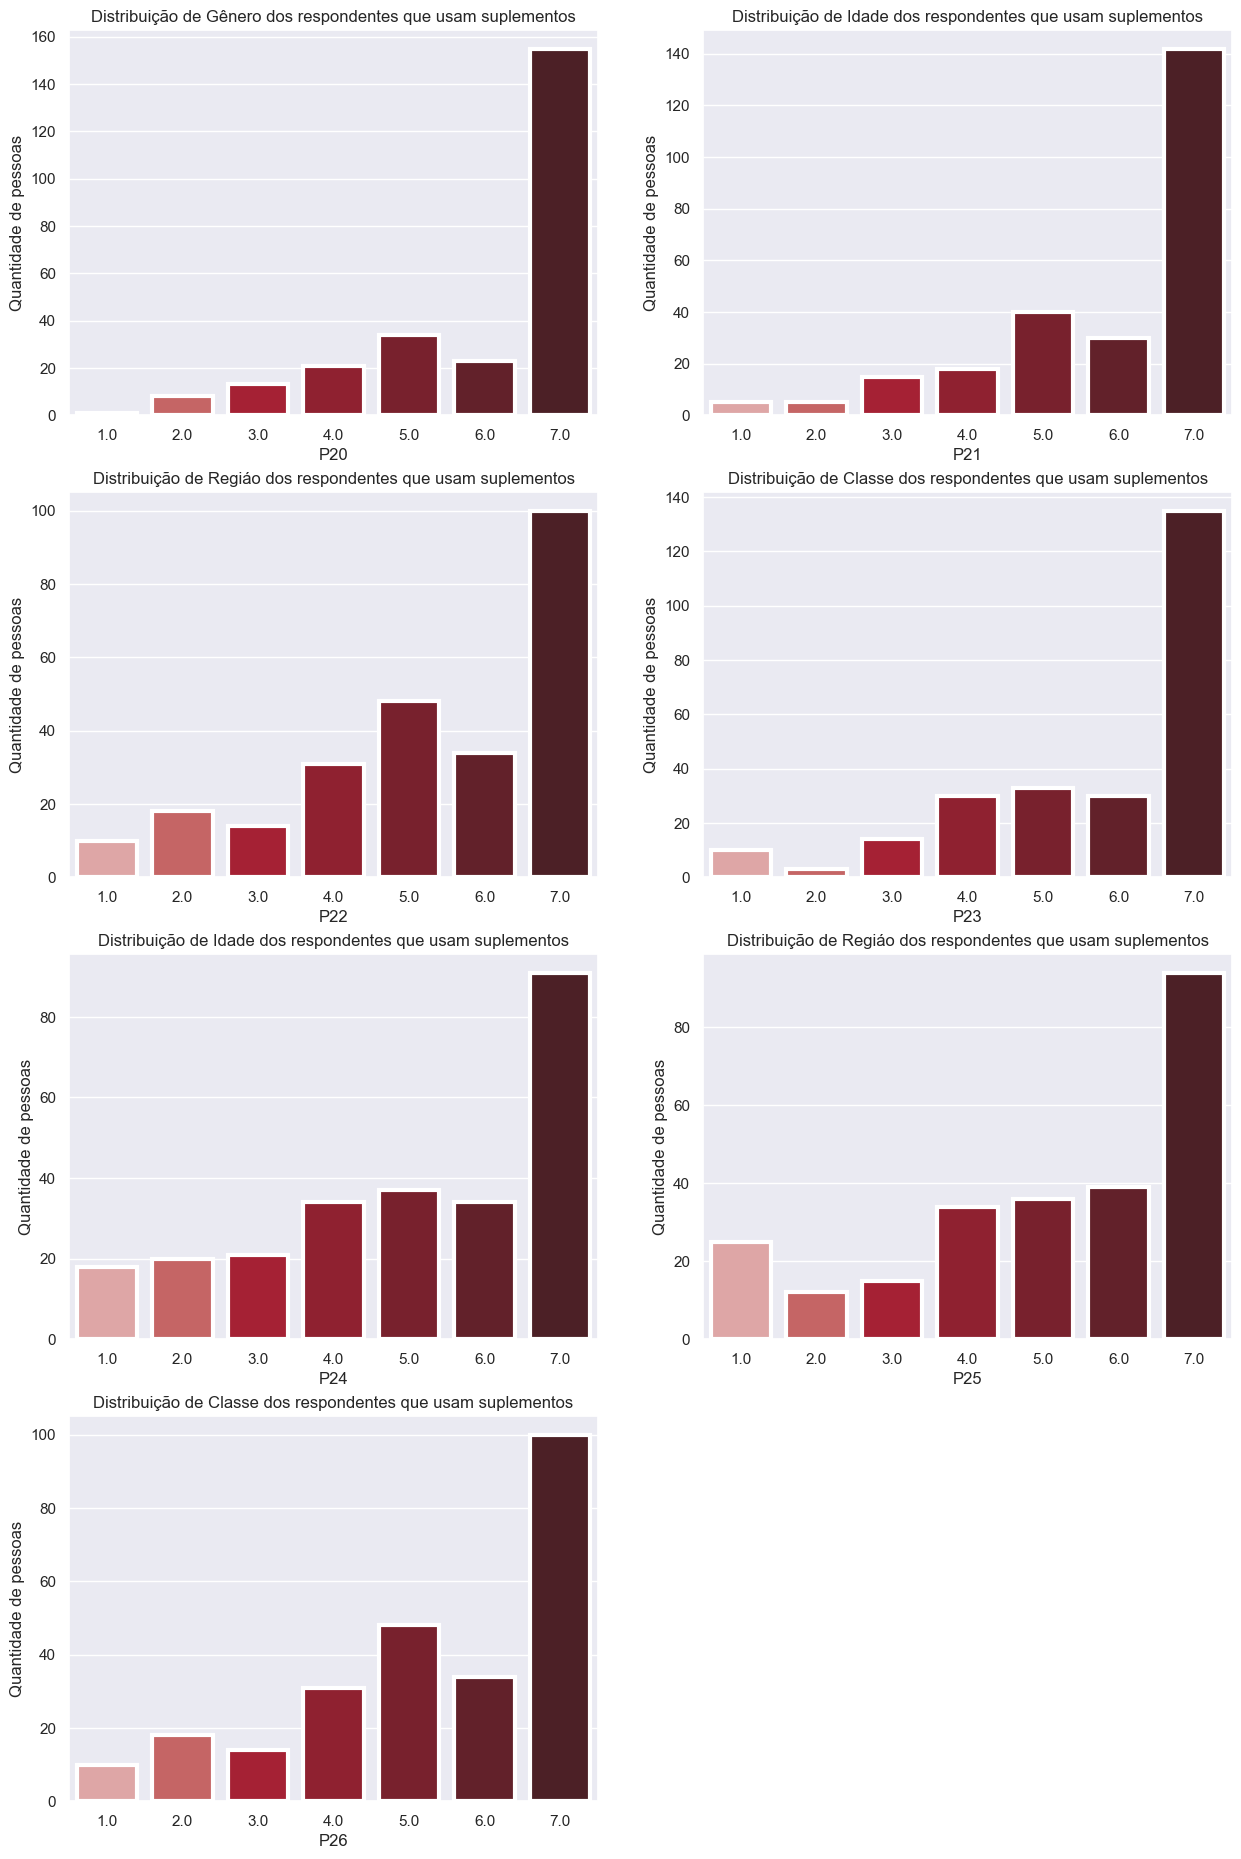

In [730]:
faixa= range(1,8,1)
plt.figure(figsize=(15,35))
plt.subplot(6,2,1)
sns.countplot(data= df_usa, x="P20", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Dos que usam suplementos, qual a preferência por praticar esportes')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Preferencia de 1 a 7')

plt.subplot(6,2,2)
sns.countplot(data= df_usa, x="P21", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Dos que usam suplementos, quais vão no nutricionista/nutrólogo')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Preferencia de 1 a 7')

plt.subplot(6,2,3)
sns.countplot(data= df_usa, x="P22", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Dos que usam suplementos, quais consomem carne mais de 4 vezes na semana')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Preferencia de 1 a 7')

plt.subplot(6,2,4)
sns.countplot(data= df_usa, x="P23", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Dos que usam suplementos, quais consomem suplementos para emagrecimento')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Preferencia de 1 a 7')

plt.subplot(6,2,5)
sns.countplot(data= df_usa, x="P24", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Dos que usam suplementos, quais consomem para ganho de massa muscular')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Preferencia de 1 a 7')

plt.subplot(6,2,6)
sns.countplot(data= df_usa, x="P25", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Dos que usam suplementos, quais preferem suplementos naturais')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Preferencia de 1 a 7')

plt.subplot(6,2,7)
sns.countplot(data= df_usa, x="P26", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Dos que usam suplementos, quais consomem para regular o sistema hormonal')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Preferencia de 1 a 7')


Plotamos gráficos da frequência de respostas das perguntas feitas para aqueles que consumiam alimentos fitness para realizarmos uma análise exploratória dos dados.

Text(0.5, 0, 'Classe')

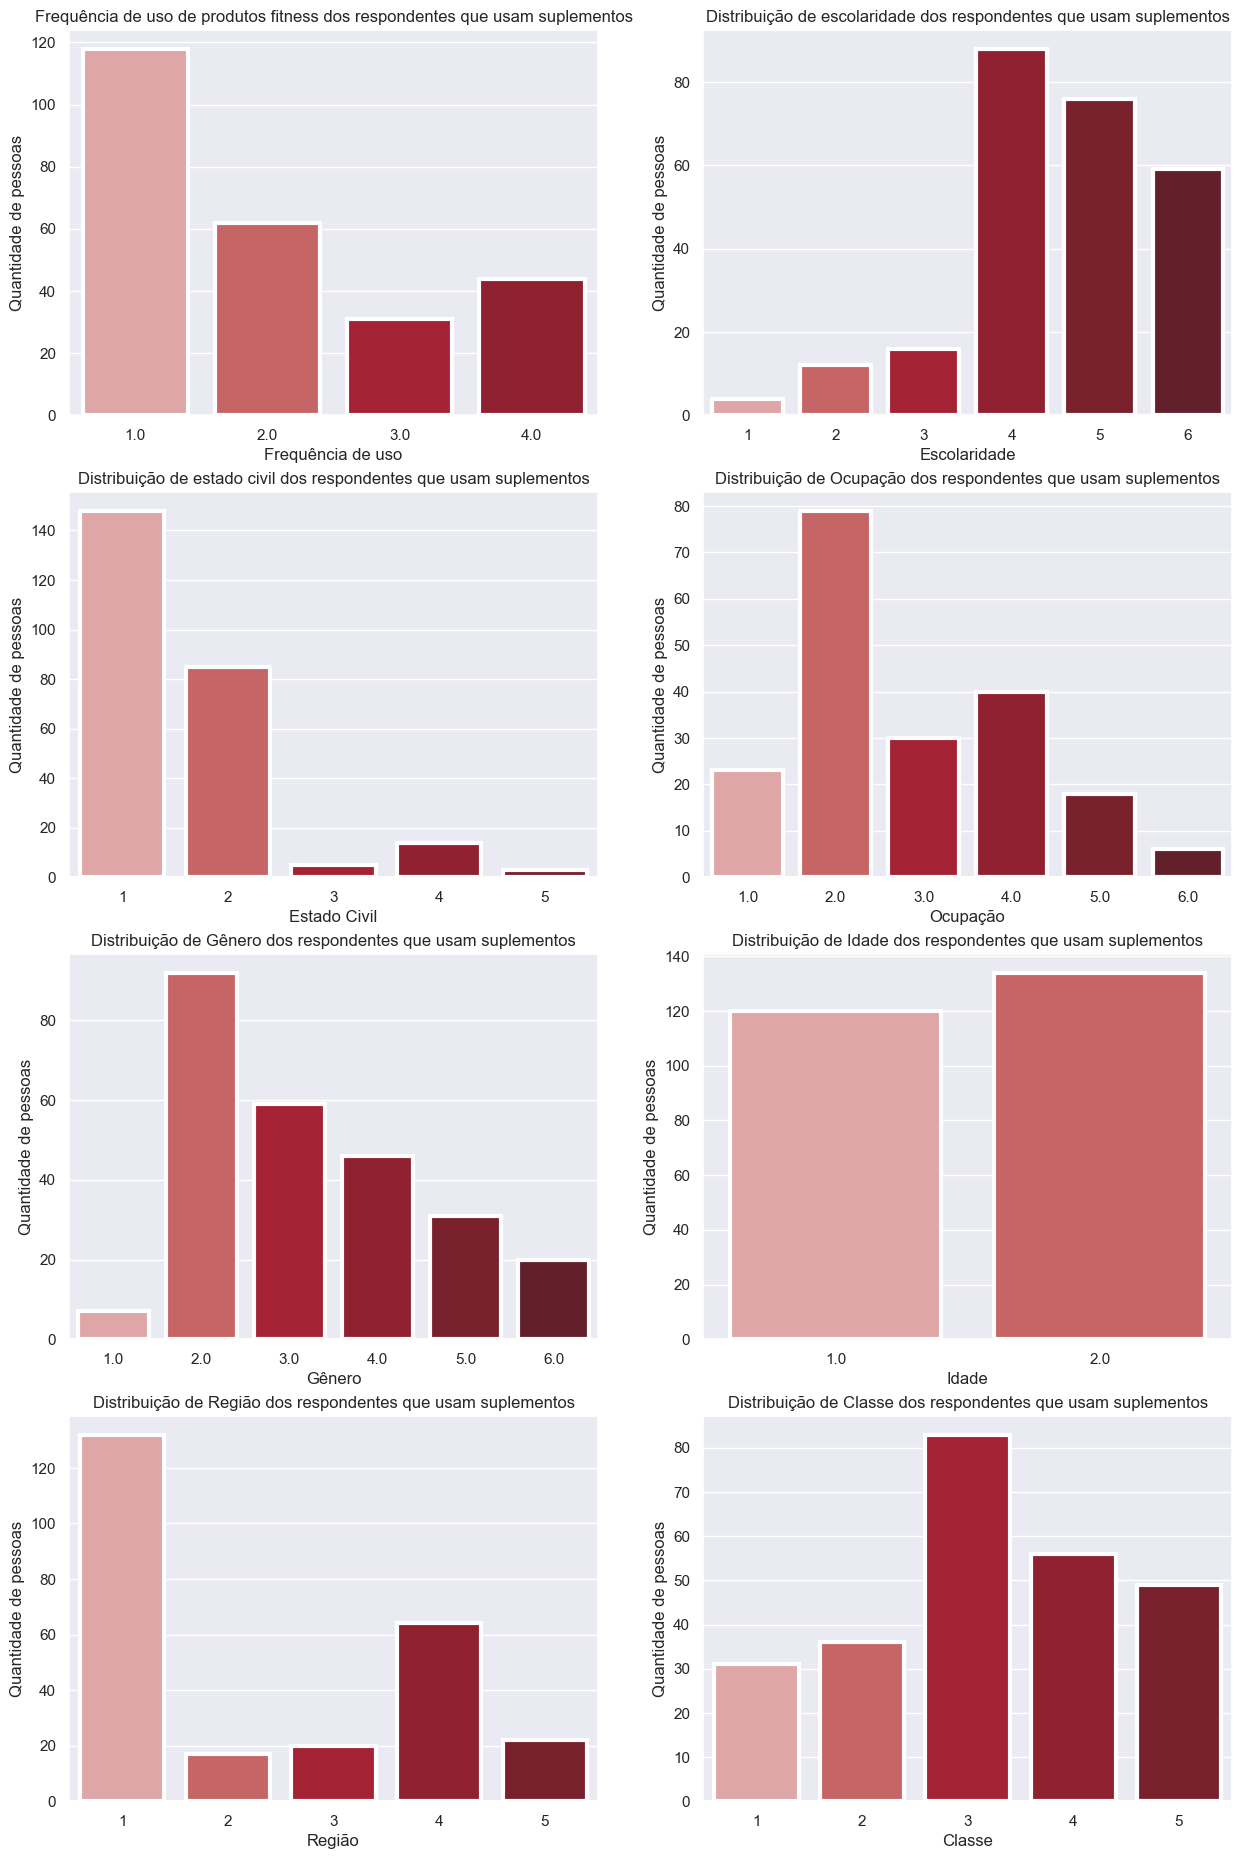

In [731]:
faixa= range(1,8,1)
plt.figure(figsize=(15,35))
plt.subplot(621)
sns.countplot(data= df_usa, x="Qfreq", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Frequência de uso de produtos fitness dos respondentes que usam suplementos')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Frequência de uso')

plt.subplot(622)
sns.countplot(data= df_usa, x="Qesc", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Distribuição de escolaridade dos respondentes que usam suplementos')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Escolaridade')

plt.subplot(623)
sns.countplot(data= df_usa, x="Qciv", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Distribuição de estado civil dos respondentes que usam suplementos')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Estado Civil')

plt.subplot(624)
sns.countplot(data= df_usa, x="Qocup", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Distribuição de Ocupação dos respondentes que usam suplementos')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Ocupação')

plt.subplot(625)
sns.countplot(data= df_usa, x="Qid", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Distribuição de Gênero dos respondentes que usam suplementos')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Gênero')

plt.subplot(626)
sns.countplot(data= df_usa, x="Qgen", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Distribuição de Idade dos respondentes que usam suplementos')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Idade')

plt.subplot(627)
sns.countplot(data= df_usa, x="Qreg", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Distribuição de Região dos respondentes que usam suplementos')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Região')

plt.subplot(628)
sns.countplot(data= df_usa, x="Qclasse", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Distribuição de Classe dos respondentes que usam suplementos')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Classe')



### Clusterização e Redução de Dimensionalidade

Iniciaremos com duas forma de análise de dados: PCA e Kmeans Cluster

Vamos atribuir algumas perguntas para as classificações em tipos de variáveis

In [732]:
df_usa.Qreg = df_usa.Qreg.astype('category')
df_usa.Qclasse = df_usa.Qclasse.astype('category')
df_usa.Qid = df_usa.Qid.astype('category')

df_usa.Qreg.cat.rename_categories = [1, 2, 3, 4, 5]
df_usa.Qclasse.cat.rename_categories = [1, 2, 3, 4, 5]
df_usa.Qid.cat.rename_categories =  [1, 2, 3, 4, 5, 6]

C:\Users\Enzo\AppData\Local\Temp\ipykernel_13292\4254042309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usa.Qreg = df_usa.Qreg.astype('category')
C:\Users\Enzo\AppData\Local\Temp\ipykernel_13292\4254042309.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usa.Qclasse = df_usa.Qclasse.astype('category')
C:\Users\Enzo\AppData\Local\Temp\ipykernel_13292\4254042309.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

### Seleção de perguntas

Agora que a base de dados foi limpa, e selecionamos respondentes que fazem um maior uso de suplementos, podemos selecionar as perguntas mais relevantes para fazermos a noralização e clusterização de base de dados.

Selecionamos as perguntas que estabelecemos ser mais diferenciais para identificar clusters dentro da nossa base de dados.

In [733]:
df_p = df_usa.loc[:,['P15', 'P22', 'P26','P19']]
df_p.describe()

,P15,P22,P26,P19
count,255.000000,255.000000,255.000000,255.000000
mean,5.756863,5.317647,5.317647,5.105882
std,1.656442,1.793767,1.793767,1.998170
min,1.000000,1.000000,1.000000,1.000000
25%,5.000000,4.000000,4.000000,4.000000
50%,7.000000,6.000000,6.000000,6.000000
75%,7.000000,7.000000,7.000000,7.000000
max,7.000000,7.000000,7.000000,7.000000


In [734]:
df_p.dtypes # checar os tipos de dados

P15    float64
P22    float64
P26    float64
P19    float64
dtype: object

In [735]:
df_p.isnull().sum() # checar a quantidade de valores nulos

P15    0
P22    0
P26    0
P19    0
dtype: int64

Preenchemos os valores faltantes com a mediana a fim de não alterar a distribuição dos dados.


In [736]:
df_p = df_p.fillna(df_p.median()) 
df_p.describe()

,P15,P22,P26,P19
count,255.000000,255.000000,255.000000,255.000000
mean,5.756863,5.317647,5.317647,5.105882
std,1.656442,1.793767,1.793767,1.998170
min,1.000000,1.000000,1.000000,1.000000
25%,5.000000,4.000000,4.000000,4.000000
50%,7.000000,6.000000,6.000000,6.000000
75%,7.000000,7.000000,7.000000,7.000000
max,7.000000,7.000000,7.000000,7.000000


### Normalização da base de dados

Uma vez selecionadas as nossas perguntas e com a base de dados limpa, pode-se normalizar os dados, etapa importante uma vez que algumas das perguntas possuiam intervalos de respostas diferentes - algo que caso não seja regularizado pode afetar o peso de cada pergunta no final da análise pelo algorítimo.

In [737]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df_p)

In [738]:
df_std[:5]

array([[ 0.75196218,  0.93973254,  0.93973254,  0.94979052],
       [ 0.14707147, -0.7360143 , -0.7360143 ,  0.44834832],
       [-2.87738209,  0.93973254,  0.93973254,  0.94979052],
       [ 0.75196218,  0.93973254,  0.93973254,  0.94979052],
       [ 0.75196218,  0.93973254,  0.93973254,  0.94979052]])

O método do KMeans demanda um número prévio n de clusters para realizar o agrupamento, porém como não temos esse dado ainda, vamos realizar uma iteração dentro de um intervalo de 1 a 15 clusters para encontrar aquele que melhor se encaixa para os nossos dados.

In [739]:
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_std)
    wcss.append(kmeans.inertia_)

c:\Users\Enzo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Da analise do grafico temos que o numero ideal de clusters é 5 - onde esta presente o "cotovelo", ponto que divide as inclinações dos pontos da curva - essa conclusão pode ser obtida por meio da utilização da regra do cotovelo. Com esse número podemos realizar a clusterização final do nosso modelo. 

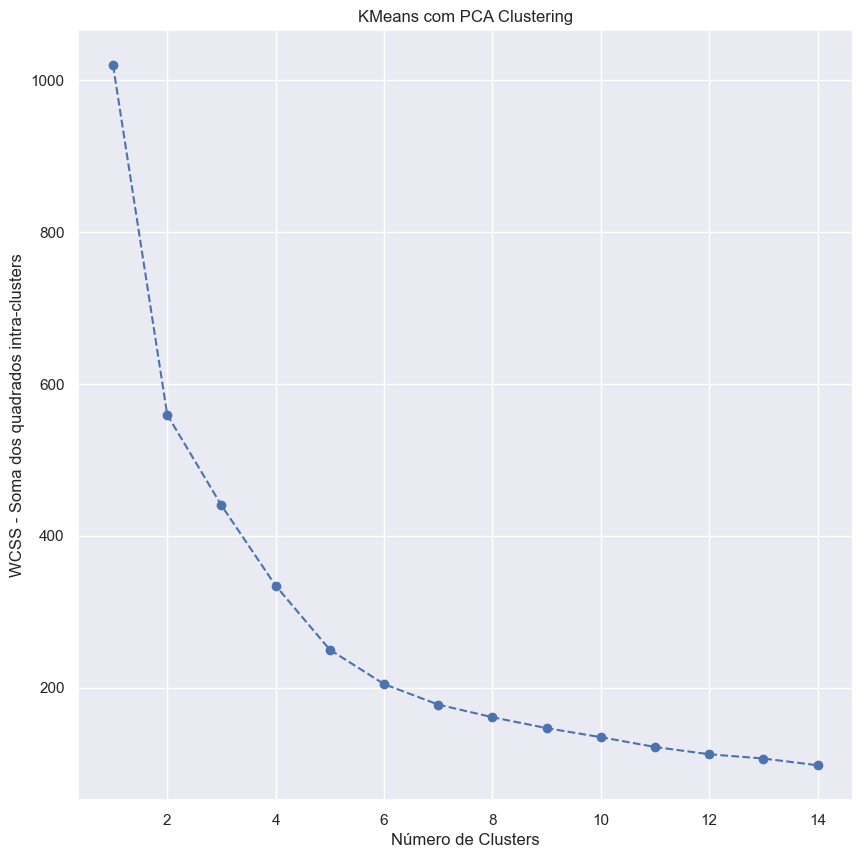

In [740]:
plt.figure(figsize=(10,10))
plt.plot(range(1,15), wcss, marker='o', linestyle='--')
plt.xlabel("Número de Clusters")
plt.ylabel('WCSS - Soma dos quadrados intra-clusters')
plt.title("KMeans com PCA Clustering")
plt.show()

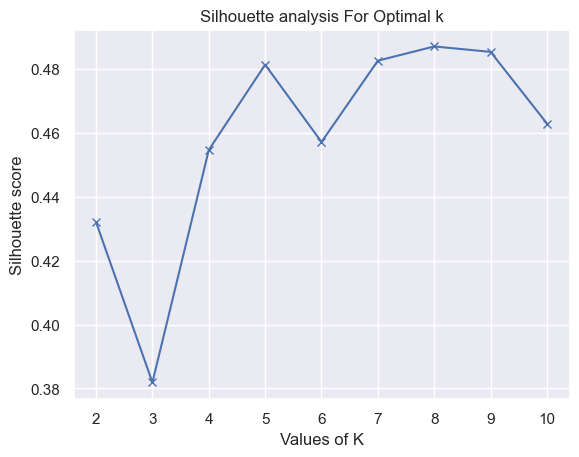

In [741]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
    # Inicializa o KMeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df_std)
    cluster_labels = kmeans.labels_
 
    # Calcula o score da silhueta
    silhouette_avg.append(silhouette_score(df_std, cluster_labels))
    
plt.plot(range_n_clusters,silhouette_avg,'bx-')

plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

Fizemos uma análise do Silhouette Score para o KMeans. Podemos perceber que a acurácia do método não é tão alta, isso ocorre devido a três motivos:
- Perguntas mal formuladas/sem valor descritivo significante
- Público Alvo da pesquisa mal delimitado
- Procedimento da clusterização utilizado

Na base de dados popdemos perceber um público alvo mal delimitado pela quantidade de pessoas que não usam suplementos e perguntas mal formuladas.

In [742]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(df_std)


KMeans(n_clusters=5, random_state=42)

Com a divisão dos clusters feita, basta colocá-la na base de dados para podermos de fato começar a estudar as características desse público e do maior cluster (que será o nosso alvo para a escolha da nossa persona). 

In [743]:
df_p_kmeans = pd.concat([df_p.reset_index(drop=True), pd.DataFrame(df_std)], axis=1)
df_p_kmeans.columns.values[-3: ] = ['Comp 1', 'Comp 2', 'Comp 3']
df_p_kmeans['Cluster'] = kmeans.labels_

df_p_kmeans.head()

,P15,P22,P26,P19,0,Comp 1,Comp 2,Comp 3,Cluster
0,7.0,7.0,7.0,7.0,0.751962,0.939733,0.939733,0.949791,1
1,6.0,4.0,4.0,6.0,0.147071,-0.736014,-0.736014,0.448348,3
2,1.0,7.0,7.0,7.0,-2.877382,0.939733,0.939733,0.949791,0
3,7.0,7.0,7.0,7.0,0.751962,0.939733,0.939733,0.949791,1
4,7.0,7.0,7.0,7.0,0.751962,0.939733,0.939733,0.949791,1


In [744]:
grouped_by_clusters = df_p_kmeans.groupby('Cluster')
grouped_by_clusters.describe()

P15                                                  P22            \
         count      mean       std  min   25%  50%  75%  max  count      mean   
Cluster                                                                         
0         55.0  4.072727  1.136182  1.0  4.00  4.0  5.0  6.0   55.0  4.909091   
1        115.0  6.669565  0.709852  4.0  7.00  7.0  7.0  7.0  115.0  6.582609   
2         30.0  6.666667  0.546672  5.0  6.00  7.0  7.0  7.0   30.0  6.233333   
3         32.0  6.656250  0.653002  5.0  6.75  7.0  7.0  7.0   32.0  2.593750   
4         23.0  2.782609  1.380267  1.0  1.50  3.0  3.0  5.0   23.0  2.565217   

         ...    Comp 2           Comp 3                                \
         ...       75%       max  count      mean       std       min   
Cluster  ...                                                            
0        ... -0.177432  0.939733   55.0 -0.226319  0.596587 -2.058863   
1        ...  0.939733  0.939733  115.0  0.766655  0.299472 -0.053094   
2        ...  0.939733  0.939733   30.0 -1.490562  0.584975 -2.058863   
3        ... -0.736014 -0.736014   32.0  0.134947  0.739932 -2.058863   
4        ... -1.294597 -0.177432   23.0 -1.535619  0.555062 -2.058863   

                                                 
              25%       50%       75%       max  
Cluster                                          
0       -0.554536 -0.053094 -0.053094  0.949791  
1        0.448348  0.949791  0.949791  0.949791  
2       -2.058863 -1.557420 -1.055978 -0.554536  
3       -0.178454  0.197627  0.949791  0.949791  
4       -2.058863 -1.557420 -1.055978 -0.554536  

[5 rows x 64 columns]

In [745]:
df_p_kmeans['Segment'] = df_p_kmeans['Cluster'].map({0:'Cluster 1',
                                                                1: 'Cluster 2',
                                                                2: 'Cluster 3',
                                                                3: 'Cluster 4',
                                                                4: 'Cluster 5'}) 

In [746]:
print(len(df_p_kmeans.columns))
vars = df_p_kmeans.columns[0:4]
col_cluster = df_p_kmeans.columns[7:8]
print(col_cluster)
vars = vars.append(col_cluster)
print(vars)

10
Index(['Comp 3'], dtype='object')
Index(['P15', 'P22', 'P26', 'P19', 'Comp 3'], dtype='object')


Fizemos uma divisão para cada cluster

In [747]:
df_p_kmeans.columns

cluster_0 =df_p_kmeans[df_p_kmeans.Cluster == 0]
cluster_1 =df_p_kmeans[df_p_kmeans.Cluster == 1]
cluster_2 =df_p_kmeans[df_p_kmeans.Cluster == 2]
cluster_3 =df_p_kmeans[df_p_kmeans.Cluster == 3]
cluster_4 =df_p_kmeans[df_p_kmeans.Cluster == 4]

lclusters = [cluster_0, cluster_1, cluster_2, cluster_3, cluster_4]

df_p_kmeans.describe()

,P15,P22,P26,P19,0,Comp 1,Comp 2,Comp 3,Cluster
count,255.000000,255.000000,255.000000,255.000000,2.550000e+02,2.550000e+02,2.550000e+02,2.550000e+02,255.000000
mean,5.756863,5.317647,5.317647,5.105882,2.525213e-17,6.966105e-17,6.966105e-17,3.382915e-16,1.423529
std,1.656442,1.793767,1.793767,1.998170,1.001967e+00,1.001967e+00,1.001967e+00,1.001967e+00,1.213862
min,1.000000,1.000000,1.000000,1.000000,-2.877382e+00,-2.411761e+00,-2.411761e+00,-2.058863e+00,0.000000
25%,5.000000,4.000000,4.000000,4.000000,-4.578192e-01,-7.360143e-01,-7.360143e-01,-5.545361e-01,1.000000
50%,7.000000,6.000000,6.000000,6.000000,7.519622e-01,3.811503e-01,3.811503e-01,4.483483e-01,1.000000
75%,7.000000,7.000000,7.000000,7.000000,7.519622e-01,9.397325e-01,9.397325e-01,9.497905e-01,2.000000
max,7.000000,7.000000,7.000000,7.000000,7.519622e-01,9.397325e-01,9.397325e-01,9.497905e-01,4.000000


In [748]:
# Ordena os clusters pelo tamanho, em ordem decrescente
lclusters.sort(key=len, reverse=True)

cluster_sel = lclusters[0]  
cluster_sel2 = lclusters[1]
cluster_sel3 = lclusters[2]
cluster_sel4 = lclusters[3]
cluster_sel5 = lclusters[4]


Selecionamos o cluster com o maior número de respondentes

In [749]:
cluster_sel.describe()

,P15,P22,P26,P19,0,Comp 1,Comp 2,Comp 3,Cluster
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.0
mean,6.669565,6.582609,6.582609,6.634783,0.552085,0.706585,0.706585,0.766655,1.0
std,0.709852,0.700659,0.700659,0.597222,0.429383,0.391376,0.391376,0.299472,0.0
min,4.000000,5.000000,5.000000,5.000000,-1.062710,-0.177432,-0.177432,-0.053094,1.0
25%,7.000000,6.000000,6.000000,6.000000,0.751962,0.381150,0.381150,0.448348,1.0
50%,7.000000,7.000000,7.000000,7.000000,0.751962,0.939733,0.939733,0.949791,1.0
75%,7.000000,7.000000,7.000000,7.000000,0.751962,0.939733,0.939733,0.949791,1.0
max,7.000000,7.000000,7.000000,7.000000,0.751962,0.939733,0.939733,0.949791,1.0


In [750]:
indices_cluster1 = cluster_sel.index.values.tolist()
indices_cluster2 = cluster_sel2.index.values.tolist()
indices_cluster3 = cluster_sel3.index.values.tolist()
indices_cluster4 = cluster_sel4.index.values.tolist()
indices_cluster5 = cluster_sel5.index.values.tolist()
print(list(cluster_sel.index.values.tolist()))

[0, 3, 4, 5, 9, 12, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 31, 35, 37, 39, 40, 41, 45, 48, 49, 51, 53, 54, 57, 61, 66, 67, 68, 75, 77, 80, 82, 88, 89, 91, 93, 94, 95, 97, 98, 100, 101, 102, 103, 106, 108, 109, 110, 115, 117, 119, 121, 122, 126, 127, 129, 132, 133, 135, 136, 141, 142, 143, 144, 145, 146, 148, 152, 158, 159, 160, 167, 169, 172, 173, 176, 182, 183, 184, 185, 188, 189, 191, 193, 194, 202, 206, 207, 210, 212, 219, 228, 229, 230, 232, 233, 234, 236, 237, 238, 241, 242, 245, 247, 249, 250]


In [751]:
df_analisef = df_usa.iloc[indices_cluster1,:]
df_analisef2 = df_usa.iloc[indices_cluster2,:]
df_analisef3 = df_usa.iloc[indices_cluster3,:]
df_analisef4 = df_usa.iloc[indices_cluster4,:]
df_analisef5 = df_usa.iloc[indices_cluster5,:]

In [752]:
df_analisef.describe()

,Qfreq,P3,P4,P5,P6,P7,P8,P9,P15,P16,...,P21,P22,P23,P24,P25,P26,Qesc,Qciv,Qocup,Qgen
count,115.000000,0.0,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,...,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,94.000000,115.000000
mean,2.026087,NaN,5.408696,3.304348,4.173913,5.321739,4.704348,4.286957,6.669565,6.252174,...,6.678261,6.582609,6.669565,6.260870,6.634783,6.582609,4.660870,1.582609,2.787234,1.521739
std,1.150598,NaN,2.025693,2.478589,2.517521,1.837942,2.530425,2.601502,0.709852,1.234330,...,0.811624,0.700659,0.709852,1.257169,0.597222,0.700659,1.176428,0.794527,1.208147,0.501713
min,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,...,1.000000,5.000000,4.000000,1.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,NaN,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,7.000000,6.000000,...,7.000000,6.000000,7.000000,6.000000,6.000000,6.000000,4.000000,1.000000,2.000000,1.000000
50%,2.000000,NaN,6.000000,2.000000,4.000000,6.000000,6.000000,5.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,5.000000,1.000000,2.000000,2.000000
75%,3.000000,NaN,7.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,2.000000,4.000000,2.000000
max,4.000000,NaN,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,5.000000,6.000000,2.000000


Foi feita uma permuta de perguntas nas células a seguir para encontrar a segmentação dos clusters.

In [753]:
df_analisef.Qesc.value_counts()

4    37
6    33
5    32
3     6
2     5
1     2
Name: Qesc, dtype: int64

In [754]:
df_analisef2.Qesc.value_counts()

4    24
6    15
5     9
3     4
2     2
1     1
Name: Qesc, dtype: int64

In [755]:
df_analisef3.Qesc.value_counts()

5    16
4    10
3     2
6     2
2     2
Name: Qesc, dtype: int64

In [756]:
df_analisef4.Qesc.value_counts()

5    16
4    10
6     2
3     2
Name: Qesc, dtype: int64

In [757]:
df_analisef5.Qesc.value_counts()

4    7
6    7
2    3
5    3
3    2
1    1
Name: Qesc, dtype: int64

Como a P13 e P14 eram perguntas de múltipla escolha, para podermos analisar as respostas do nosso cluster, fizemos uma separação  por listas

In [758]:
lista_marcas = []
lista_marcas = df_analisef.P13.to_list()


lista_m = []
for j in lista_marcas:
    if isinstance(j, str):
        item = j.split(';')
        lista_m.append(item)
    elif isinstance(j, int):
        lista_m.append(j)
    elif isinstance(j, float):
        lista_m.append(j)


Função para converter as respostas em números, para que possamos fazer a normalização da base de dados.

In [759]:
def convert_to_num(s):
    try:
        return int(s)
    except ValueError:
        try:
            return float(s)
        except ValueError:
            return 3

Transformando em uma única lista de respostas, para que possamos fazer a normalização da base de dados.

In [760]:

flat_list = list(chain.from_iterable([i if isinstance(i, list) else [i] for i in lista_m]))



Removendo os espaços em branco, convertendo strings numéricas em números e filtrando valores nulos.

In [761]:

clean_list = [convert_to_num(i.strip()) if isinstance(i, str) else i for i in flat_list if not isinstance(i, float) or not math.isnan(i)]


count = Counter(clean_list)

print(count)


Counter({4: 79, 6: 53, 1: 38, 2: 21, 5: 12, 3: 8, 7: 6, 8: 5})


O mesmo procedimento será realizado para a Pergunta 14

In [762]:
lista_sabendo = []
lista_sabendo = df_analisef.P14.to_list()


lista_14 = []
for w in lista_sabendo:
    if isinstance(w, str):
        item = w.split(';')
        lista_14.append(item)
    elif isinstance(w, int):
        lista_14.append(w)
    elif isinstance(w, float):
        lista_14.append(w)


In [763]:
lista_unica = list(chain.from_iterable([i if isinstance(i, list) else [i] for i in lista_14]))

In [764]:
lista_limpa = [convert_to_num(i.strip()) if isinstance(i, str) else i for i in lista_unica if not isinstance(i, float) or not math.isnan(i)]


contador = Counter(lista_limpa)

print(contador)

Counter({1: 63, 2: 56, 3: 34, 4: 20, 7: 19, 5: 16, 6: 15})


Gráfico do cluster selecionado:

Text(0.5, 0, 'Frequência de Academia')

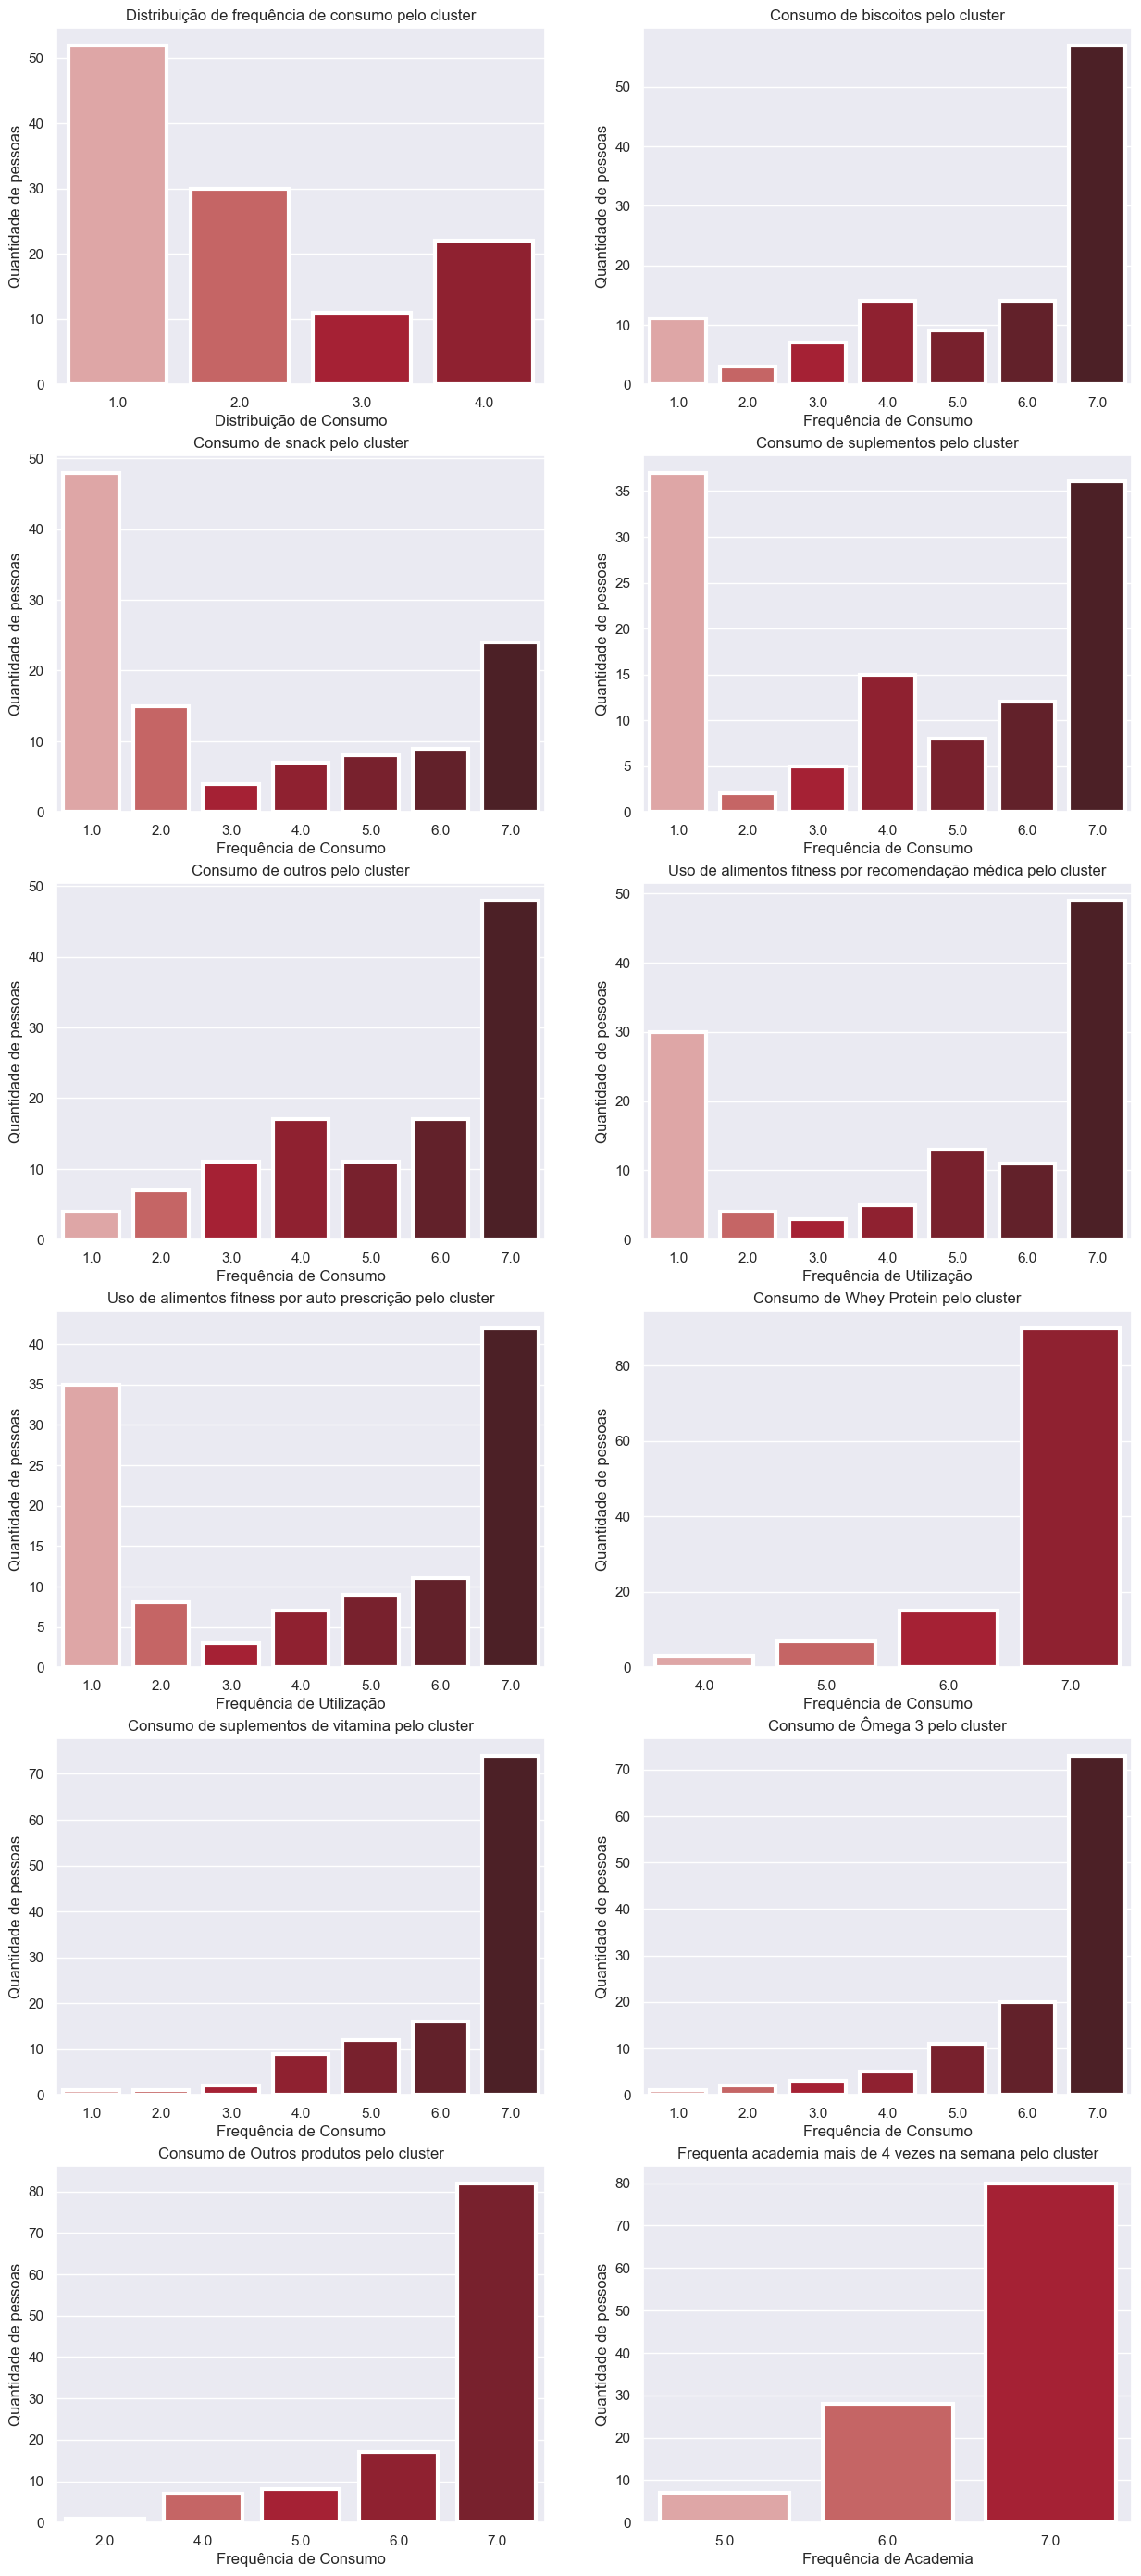

In [765]:
faixa= range(1,8,1)
plt.figure(figsize=(15,35))
plt.subplot(621)

sns.countplot(data= df_analisef, x="Qfreq", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Distribuição de frequência de consumo pelo cluster')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Distribuição de Consumo')

plt.subplot(622)
sns.countplot(data= df_analisef, x="P4", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Consumo de biscoitos pelo cluster')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Frequência de Consumo')

plt.subplot(623)
sns.countplot(data= df_analisef, x="P5", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Consumo de snack pelo cluster')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Frequência de Consumo')

plt.subplot(624)
sns.countplot(data= df_analisef, x="P6", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Consumo de suplementos pelo cluster')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Frequência de Consumo')

plt.subplot(625)
sns.countplot(data= df_analisef, x="P7", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Consumo de outros pelo cluster')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Frequência de Consumo')

plt.subplot(626)
sns.countplot(data= df_analisef, x="P8", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Uso de alimentos fitness por recomendação médica pelo cluster')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Frequência de Utilização')

plt.subplot(627)
sns.countplot(data= df_analisef, x="P9", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Uso de alimentos fitness por auto prescrição pelo cluster')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Frequência de Utilização')

plt.subplot(628)
sns.countplot(data= df_analisef, x="P15", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Consumo de Whey Protein pelo cluster')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Frequência de Consumo')

plt.subplot(629)
sns.countplot(data= df_analisef, x="P16", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Consumo de suplementos de vitamina pelo cluster')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Frequência de Consumo')

plt.subplot(6,2,10)
sns.countplot(data= df_analisef, x="P17", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Consumo de Ômega 3 pelo cluster')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Frequência de Consumo')

plt.subplot(6,2,11)
sns.countplot(data= df_analisef, x="P18", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Consumo de Outros produtos pelo cluster')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Frequência de Consumo')

plt.subplot(6,2,12)
sns.countplot(data= df_analisef, x="P19", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Frequenta academia mais de 4 vezes na semana pelo cluster')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Frequência de Academia')


Text(0.5, 0, 'Frequência de Utilização')

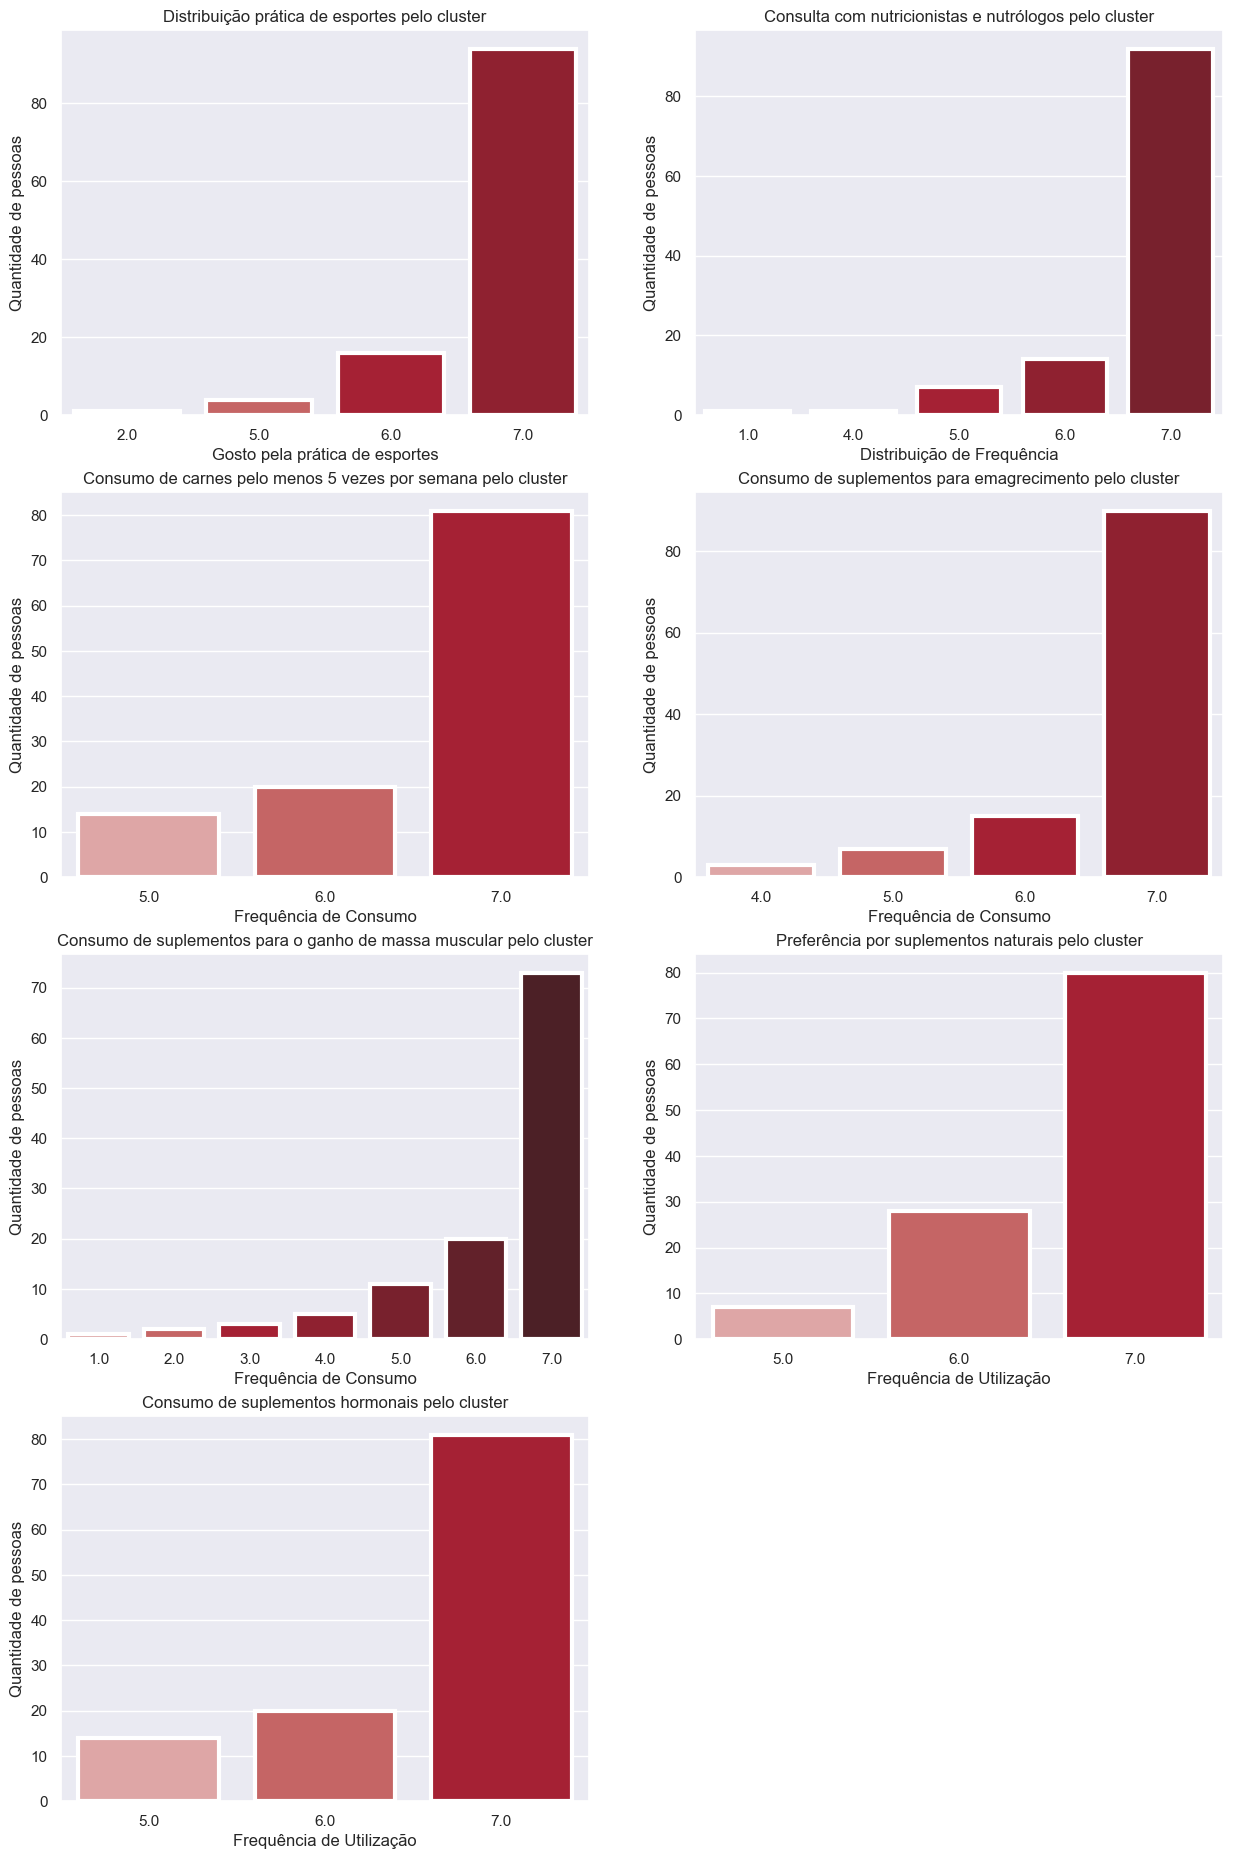

In [766]:
faixa= range(1,8,1)
plt.figure(figsize=(15,35))
plt.subplot(621)
sns.countplot(data= df_analisef, x="P20", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Distribuição prática de esportes pelo cluster')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Gosto pela prática de esportes')

plt.subplot(622)
sns.countplot(data= df_analisef, x="P21", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Consulta com nutricionistas e nutrólogos pelo cluster')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Distribuição de Frequência')

plt.subplot(623)
sns.countplot(data= df_analisef, x="P22", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Consumo de carnes pelo menos 5 vezes por semana pelo cluster')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Frequência de Consumo')

plt.subplot(624)
sns.countplot(data= df_analisef, x="P23", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#A10F23","#6D1622","#531921"], lw=3)
plt.title('Consumo de suplementos para emagrecimento pelo cluster')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Frequência de Consumo')

plt.subplot(625)
sns.countplot(data= df_analisef, x="P24", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Consumo de suplementos para o ganho de massa muscular pelo cluster')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Frequência de Consumo')

plt.subplot(626)
sns.countplot(data= df_analisef, x="P25", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Preferência por suplementos naturais pelo cluster')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Frequência de Utilização')

plt.subplot(627)
sns.countplot(data= df_analisef, x="P26", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Consumo de suplementos hormonais pelo cluster')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Frequência de Utilização')

c:\Users\Enzo\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


Text(0.5, 0, 'Classe')

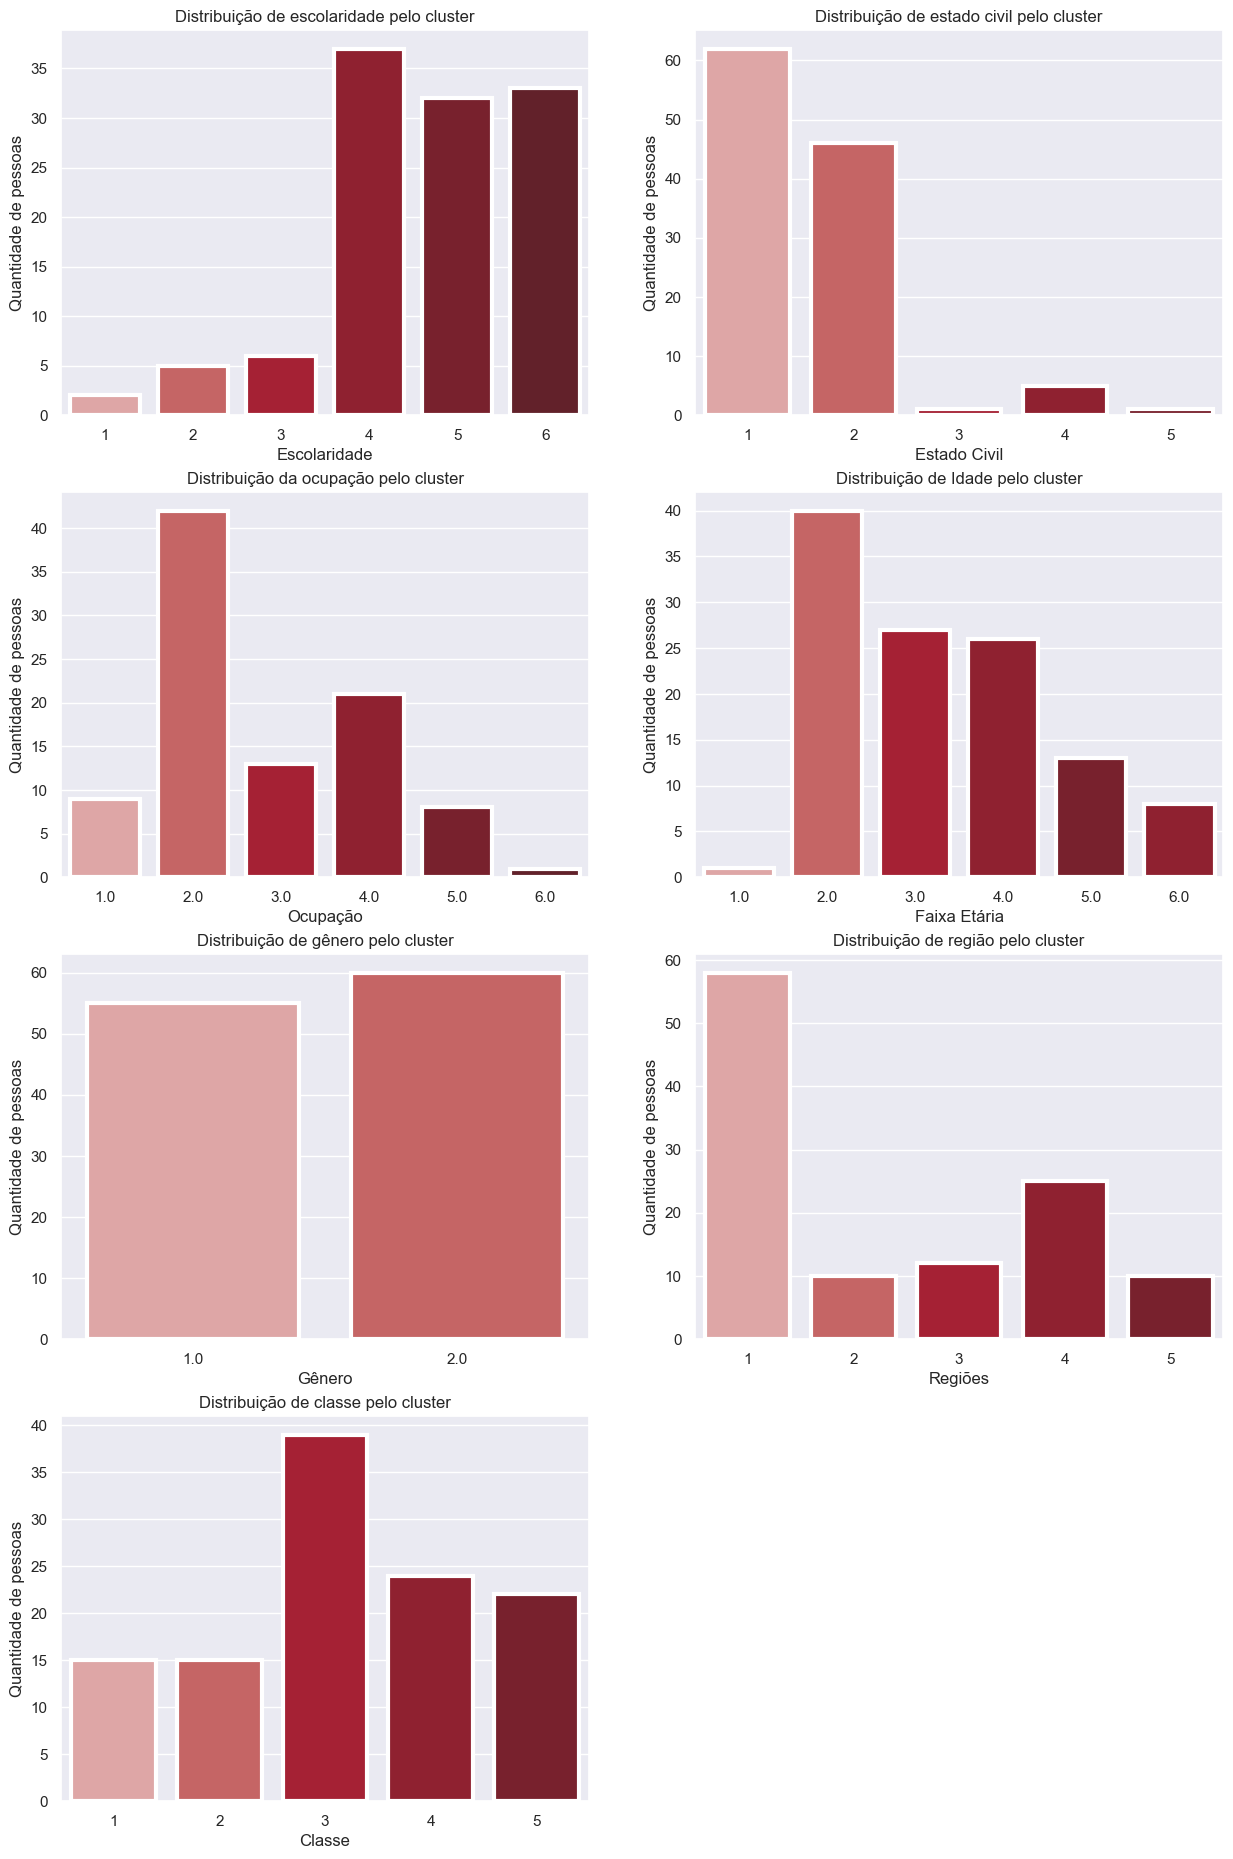

In [767]:
faixa= range(1,8,1)
plt.figure(figsize=(15,35))
plt.subplot(621)
sns.countplot(data= df_analisef, x="Qesc", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Distribuição de escolaridade pelo cluster')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Escolaridade')

plt.subplot(622)
sns.countplot(data= df_analisef, x="Qciv", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Distribuição de estado civil pelo cluster')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Estado Civil')

plt.subplot(623)
sns.countplot(data= df_analisef, x="Qocup", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Distribuição da ocupação pelo cluster')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Ocupação')

plt.subplot(624)
sns.countplot(data= df_analisef, x="Qid", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#A10F23","#6D1622","#531921"], lw=3)
plt.title('Distribuição de Idade pelo cluster')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Faixa Etária')

plt.subplot(625)
sns.countplot(data= df_analisef, x="Qgen", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Distribuição de gênero pelo cluster')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Gênero')

plt.subplot(626)
sns.countplot(data= df_analisef, x="Qreg", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Distribuição de região pelo cluster')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Regiões')

plt.subplot(627)
sns.countplot(data= df_analisef, x="Qclasse", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Distribuição de classe pelo cluster')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Classe')

Analisando a base de dados de pessoas que não usam produtos fitness

In [768]:
df_naousa.head()

,Qfreq,P2,P3,P4,P5,P6,P7,P8,P9,P12,...,P24,P25,P26,Qesc,Qciv,Qocup,Qgen,Qid,Qreg,Qclasse
7,5.0,2,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4,1,3.0,1.0,2.0,4,5
10,5.0,2,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3,1,5.0,1.0,2.0,3,5
14,5.0,1;3;4,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4,1,4.0,1.0,2.0,3,5
15,5.0,1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3,1,3.0,1.0,1.0,4,5
17,5.0,7,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4,2,2.0,1.0,2.0,2,5


Como a P2 também é uma pergunta de múltipla escolha, para podermos analisar as respostas do nosso cluster, fizemos uma separação  por listas

In [769]:
lista_motivos = []
lista_motivos = df_naousa.P2.to_list()


lista_2 = []
for z in lista_motivos:
    if isinstance(z, str):
        item = z.split(';')
        lista_2.append(item)
    elif isinstance(z, int):
        lista_2.append(z)
    elif isinstance(z, float):
        lista_2.append(w)

lista_u = list(chain.from_iterable([i if isinstance(i, list) else [i] for i in lista_2]))
lista_l = [convert_to_num(i.strip()) if isinstance(i, str) else i for i in lista_u if not isinstance(i, float) or not math.isnan(i)]


contador2 = Counter(lista_l)

print(contador2)


Counter({1: 266, 7: 114, 6: 98, 5: 76, 3: 70, 2: 56, 4: 49})


Das pessoas que não consomem produtos fitness, queríamos observar quem iria comprar esses produtos se o preço fosse menor.

In [770]:
df_naousa.P3.value_counts()

5.0    71
1.0    66
4.0    61
7.0    57
6.0    43
2.0    33
3.0    32
Name: P3, dtype: int64

Text(0.5, 0, 'Disposição de 1 a 7')

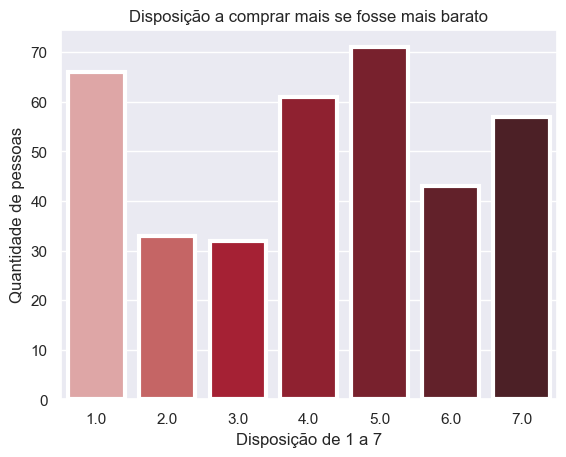

In [771]:
sns.countplot(data= df_naousa, x="P3", palette = ["#E79D9D", "#D55555", "#BB0B24","#A10F23","#871223","#6D1622","#531921"], lw=3)
plt.title('Disposição a comprar mais se fosse mais barato')
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Disposição de 1 a 7')

In [772]:
lista_p2_u = list(chain.from_iterable([i if isinstance(i, list) else [i] for i in lista_2]))
lista_p2_lim = [convert_to_num(i.strip()) if isinstance(i, str) else i for i in lista_p2_u if not isinstance(i, float) or not math.isnan(i)]


contador3 = Counter(lista_p2_lim)

print(contador3)


Counter({1: 266, 7: 114, 6: 98, 5: 76, 3: 70, 2: 56, 4: 49})


266 pessoas não consome alimentos fitness porque não faz questão. 114 pessoas não consome alimentos fitness porque acha os produtos excessivamente caros. 98 pessoas não consome alimentos fitness porque não gosta dos sabores dos produtos. 76 pessoas não consomem porque o médico recomendou não utilizar esses produtos. 70 pessoas não confiam em propagandas feitas pelas marcas. 56 pessoas disseram não gostar de consumos de produtos artificiais. 49 pessoas não acreditam que os produtos conseguem cumprir com a sua proposta.